data/Vivosight_data/M16_Results [<data_types.BloodFlow object at 0x119a06480>, <data_types.BloodFlow object at 0x107470110>, <data_types.BloodFlow object at 0x11ad31c70>, <data_types.BloodFlow object at 0x11ad33560>, <data_types.BloodFlow object at 0x11ad323f0>, <data_types.BloodFlow object at 0x11ad32150>, <data_types.BloodFlow object at 0x11ad300b0>, <data_types.BloodFlow object at 0x11ad302f0>, <data_types.BloodFlow object at 0x11ad31940>, <data_types.BloodFlow object at 0x11a631700>, <data_types.BloodFlow object at 0x11a632570>, <data_types.BloodFlow object at 0x11a633290>, <data_types.BloodFlow object at 0x11b583590>, <data_types.BloodFlow object at 0x11b581c10>, <data_types.BloodFlow object at 0x11ada8c20>, <data_types.BloodFlow object at 0x11adaa210>, <data_types.BloodFlow object at 0x11adab9b0>, <data_types.BloodFlow object at 0x119d7c8c0>, <data_types.BloodFlow object at 0x11adab770>, <data_types.BloodFlow object at 0x119d7d3d0>, <data_types.BloodFlow object at 0x11a1b51f0>, <

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


data/Vivosight_data/M16_2_Results [<data_types.BloodFlow object at 0x11a2ab470>, <data_types.BloodFlow object at 0x11b0fb7d0>, <data_types.BloodFlow object at 0x11b20cf80>, <data_types.BloodFlow object at 0x11a42e630>, <data_types.BloodFlow object at 0x11a8a47a0>, <data_types.BloodFlow object at 0x11a8a7e00>, <data_types.BloodFlow object at 0x11a8a52b0>, <data_types.BloodFlow object at 0x11a8a66c0>, <data_types.BloodFlow object at 0x11af83ef0>, <data_types.BloodFlow object at 0x11b582480>, <data_types.BloodFlow object at 0x11afa8f50>, <data_types.BloodFlow object at 0x11a60bb00>, <data_types.BloodFlow object at 0x11ad49eb0>, <data_types.BloodFlow object at 0x11ab28fe0>, <data_types.BloodFlow object at 0x11ad49ee0>, <data_types.BloodFlow object at 0x11b0ec260>, <data_types.BloodFlow object at 0x11aafca40>, <data_types.BloodFlow object at 0x11b0873e0>, <data_types.BloodFlow object at 0x11b084140>, <data_types.BloodFlow object at 0x11b086660>, <data_types.BloodFlow object at 0x11a4774d0>,

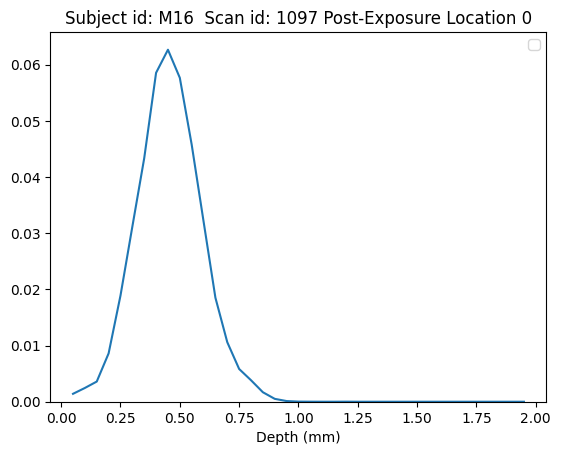

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1097 0 False 0.062673 True 0


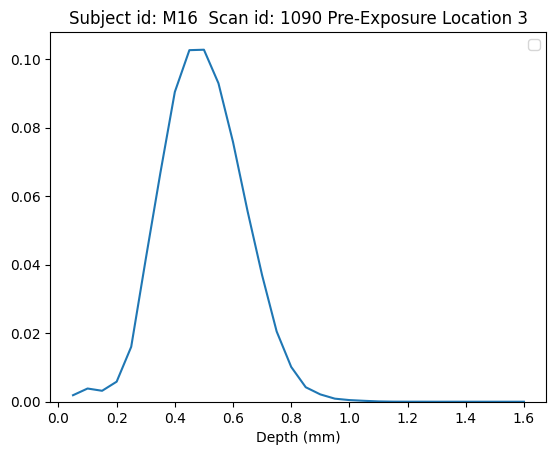

1090 3 False 0.102703 False 3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


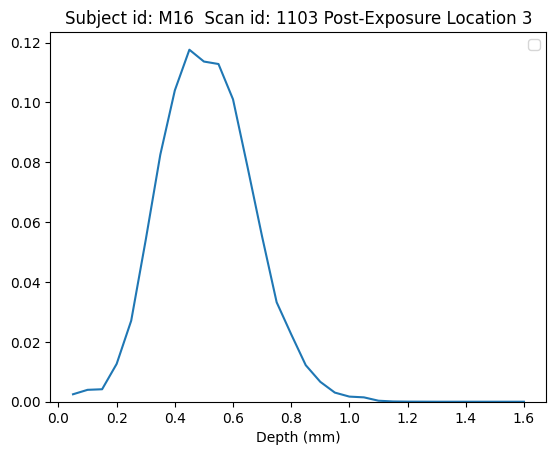

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1103 3 False 0.11759 True 3


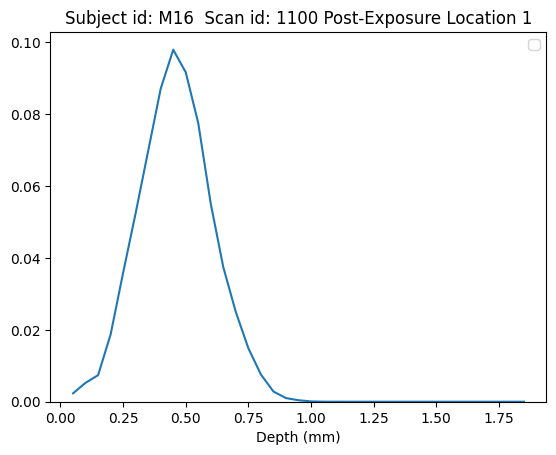

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1100 1 False 0.0979076 True 1


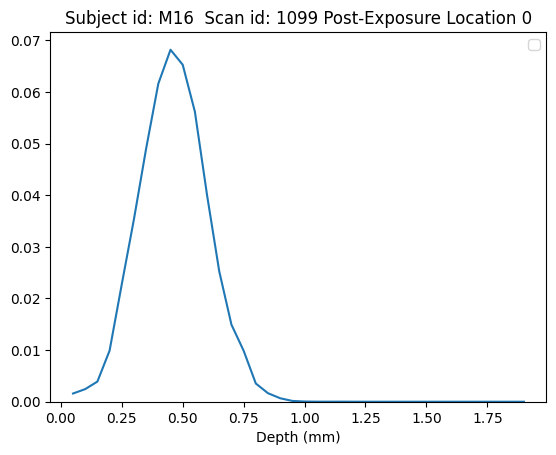

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1099 0 False 0.0681848 True 0


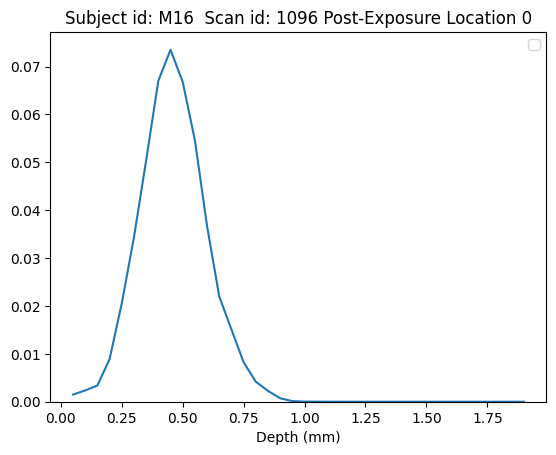

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1096 0 False 0.0735267 True 0


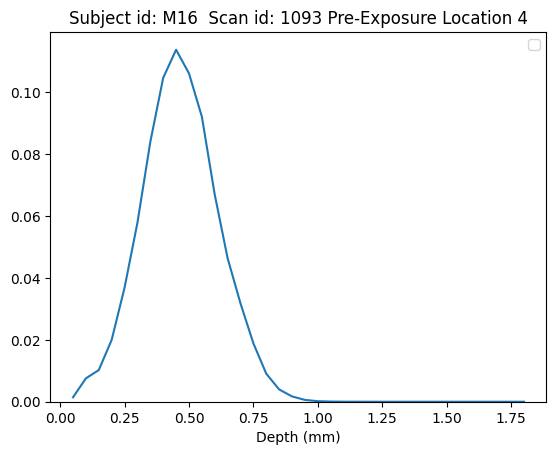

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1093 4 False 0.113681 False 4


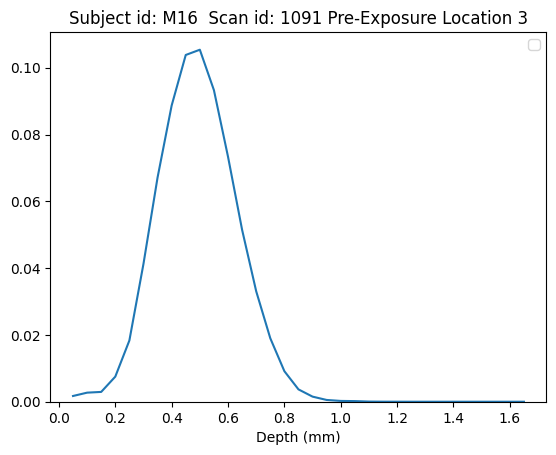

1091 3 False 0.105393 False 3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


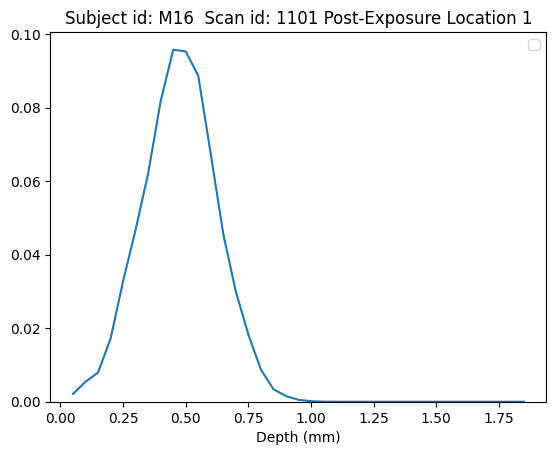

1101 1 False 0.0957575 True 1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


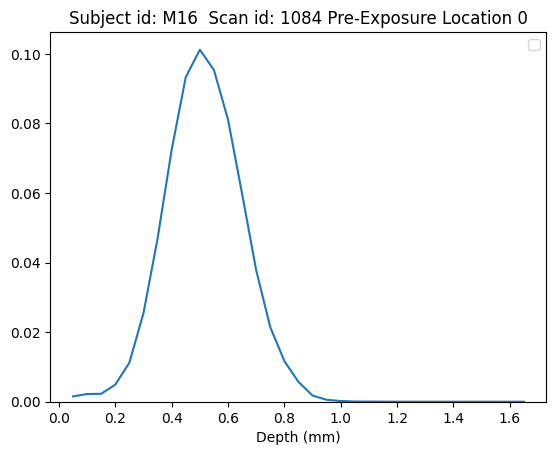

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1084 0 False 0.1012 False 0


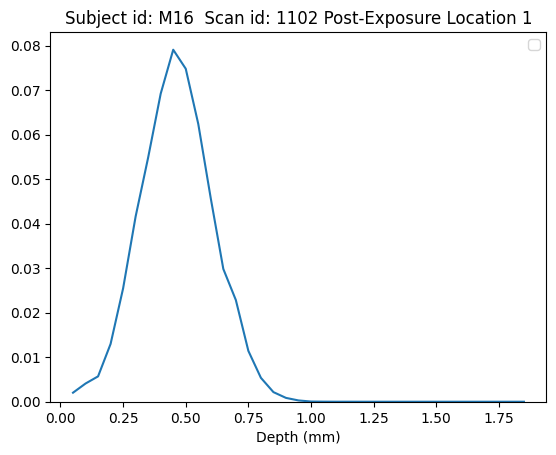

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1102 1 False 0.0791159 True 1


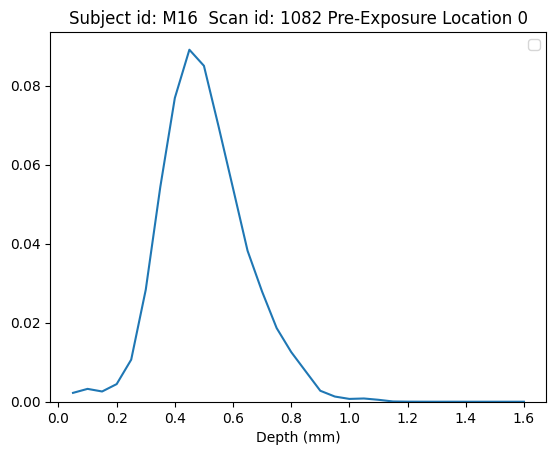

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1082 0 False 0.089099 False 0


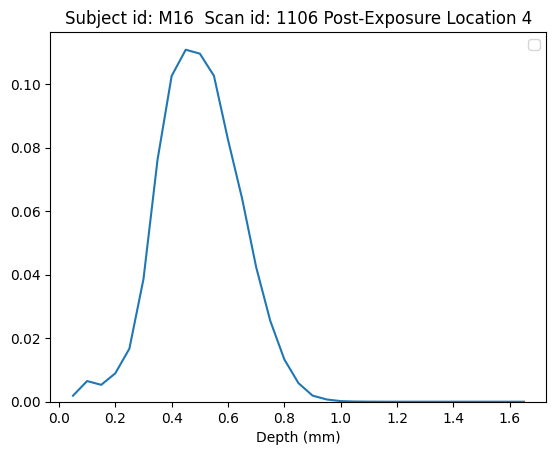

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1106 4 False 0.110852 True 4


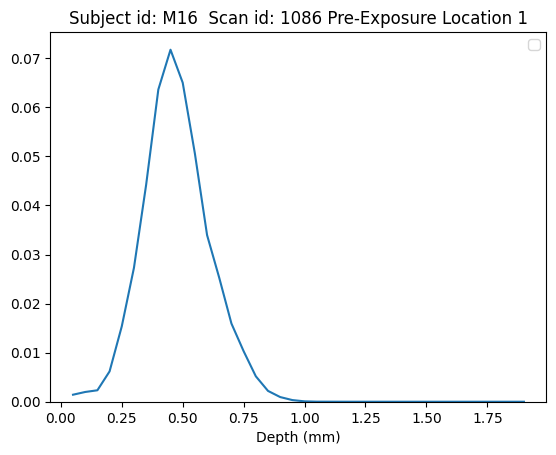

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1086 1 False 0.0717388 False 1


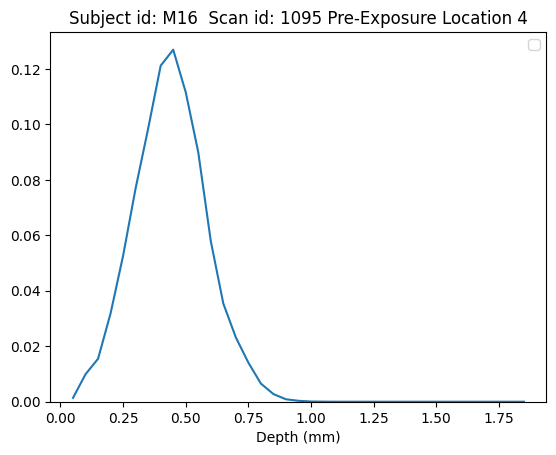

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1095 4 False 0.126914 False 4


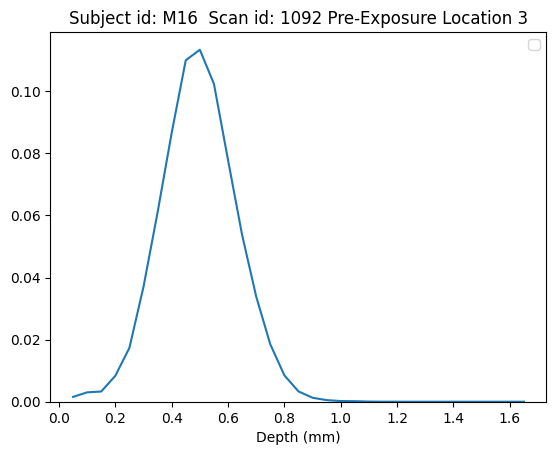

1092 3 False 0.113365 False 3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


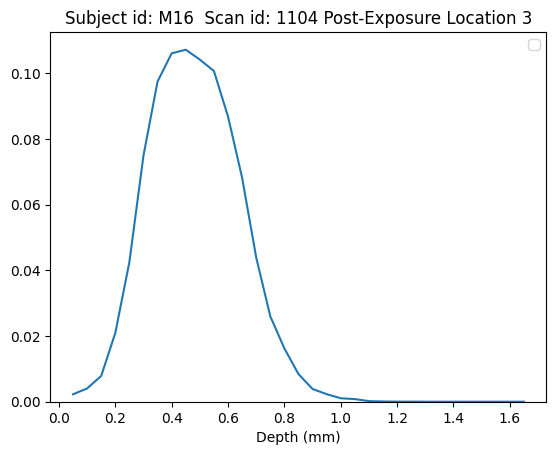

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1104 3 False 0.107174 True 3


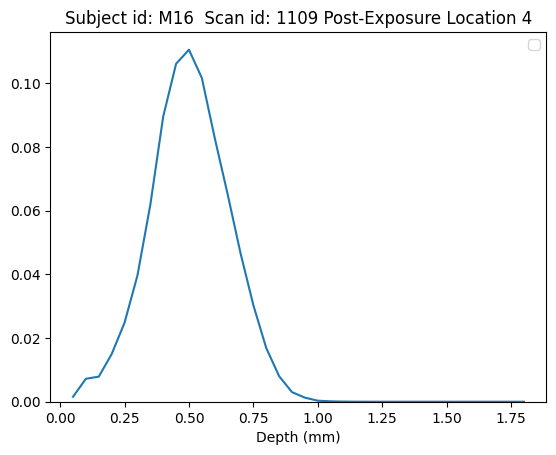

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1109 4 False 0.110483 True 4


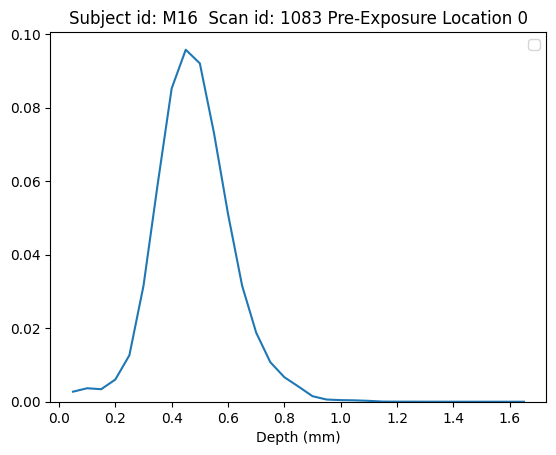

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1083 0 False 0.0957408 False 0


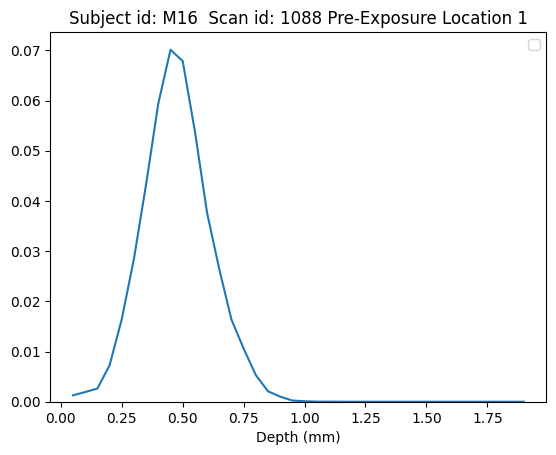

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1088 1 False 0.0701262 False 1


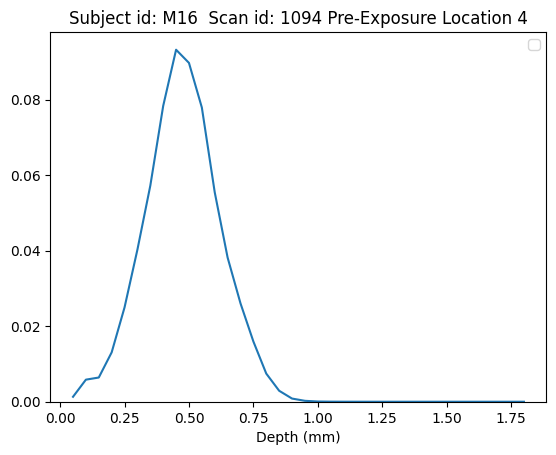

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1094 4 False 0.0931892 False 4


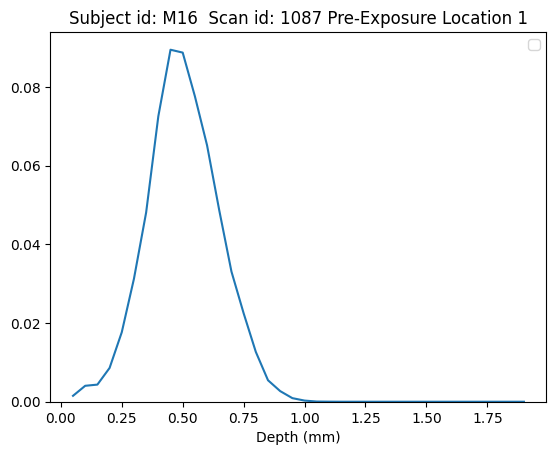

1087 1 False 0.0894417 False 1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


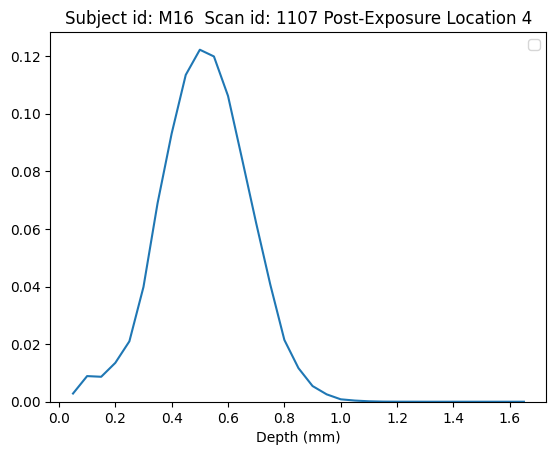

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1107 4 False 0.122219 True 4


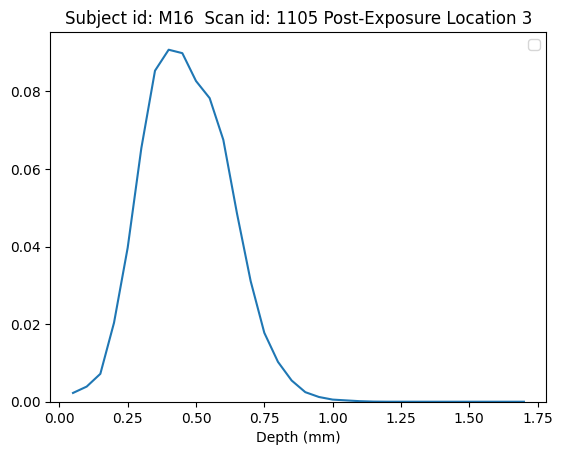

1105 3 False 0.0907142 True 3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


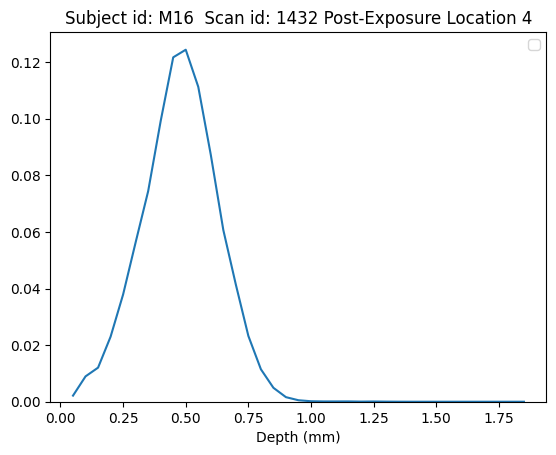

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1432 4 True 0.124371 True 4


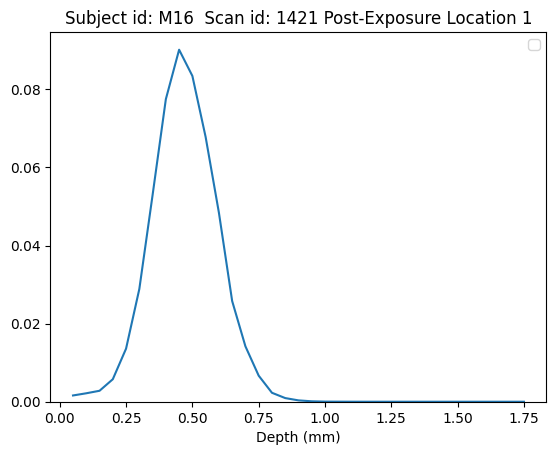

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1421 1 True 0.0901406 True 1


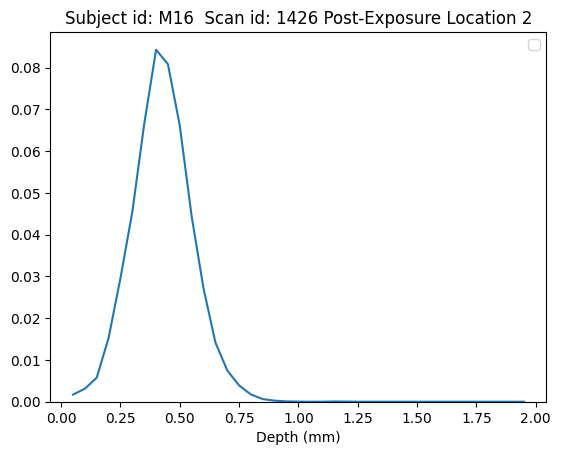

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1426 2 True 0.0842625 True 2


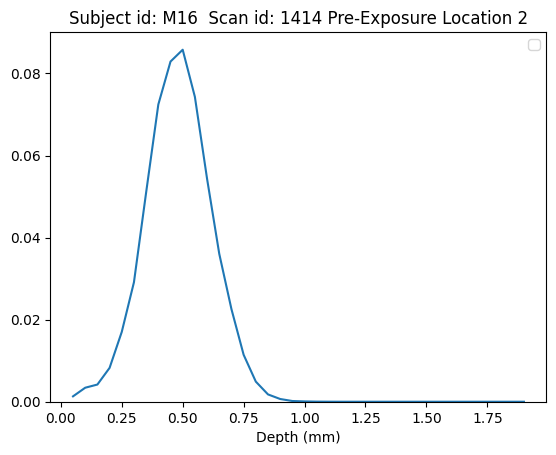

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1414 2 True 0.0857925 False 2


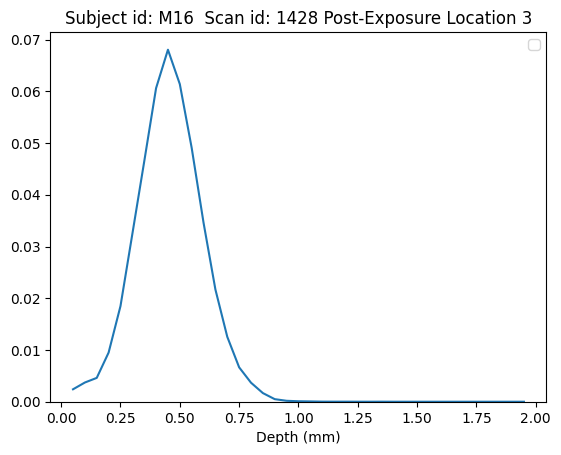

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1428 3 True 0.0680383 True 3


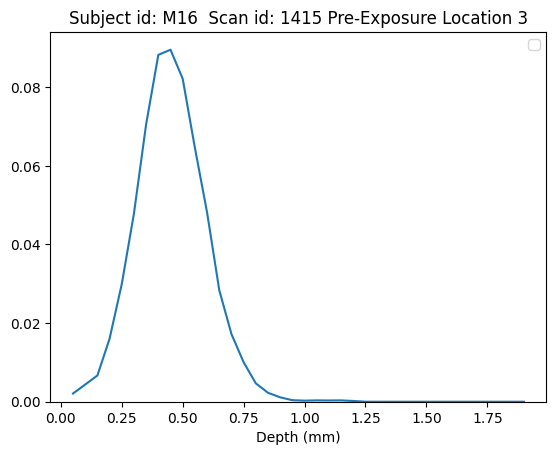

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1415 3 True 0.0895514 False 3


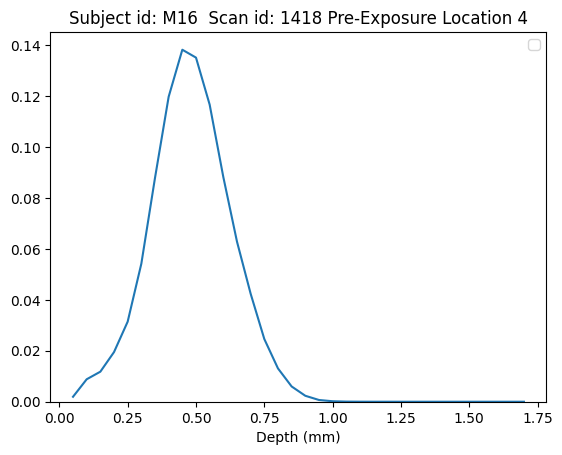

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1418 4 True 0.138171 False 4


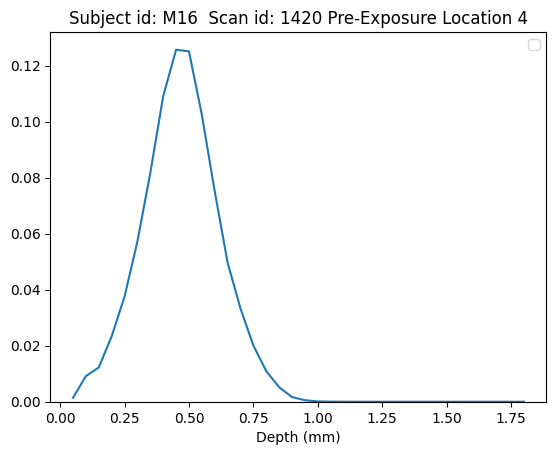

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1420 4 True 0.125715 False 4


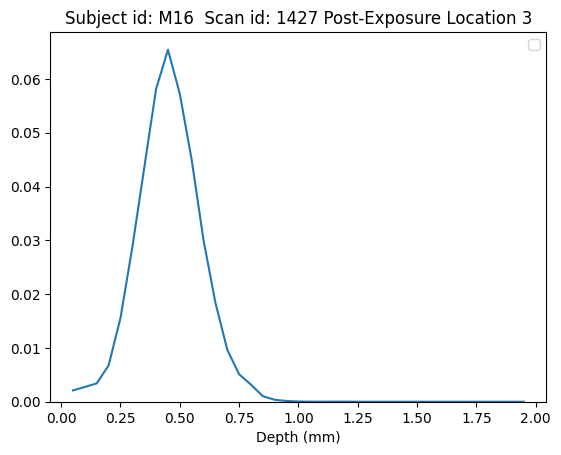

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1427 3 True 0.0654262 True 3


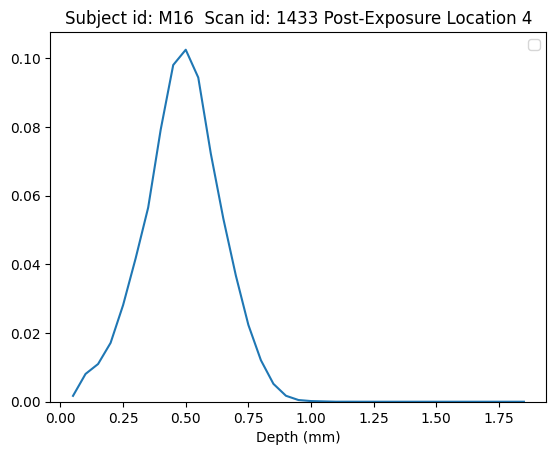

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1433 4 True 0.102471 True 4


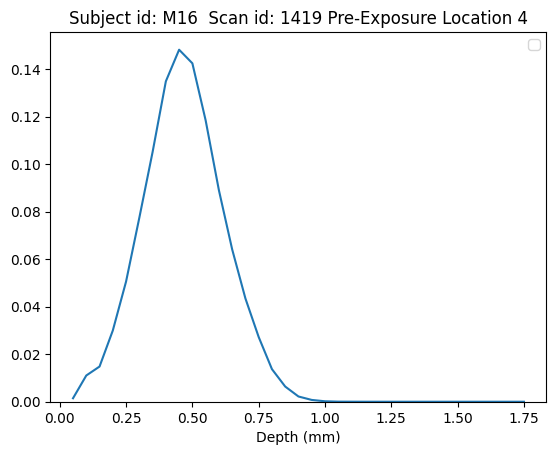

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1419 4 True 0.148137 False 4


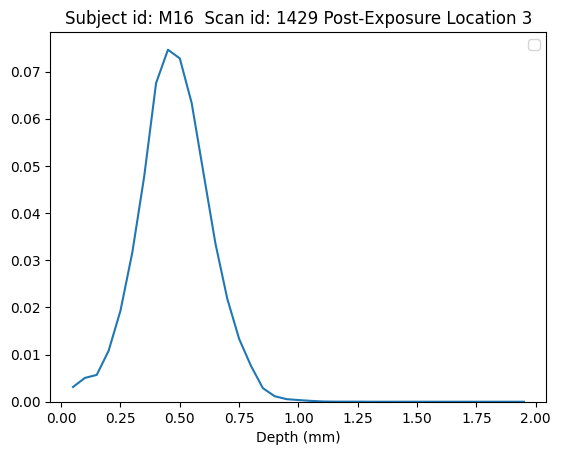

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1429 3 True 0.0746428 True 3


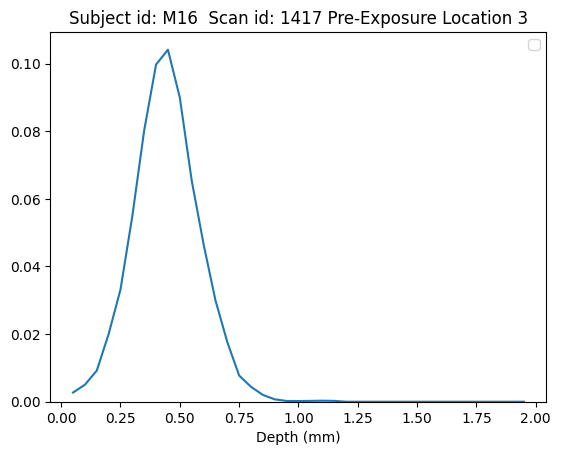

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1417 3 True 0.104122 False 3


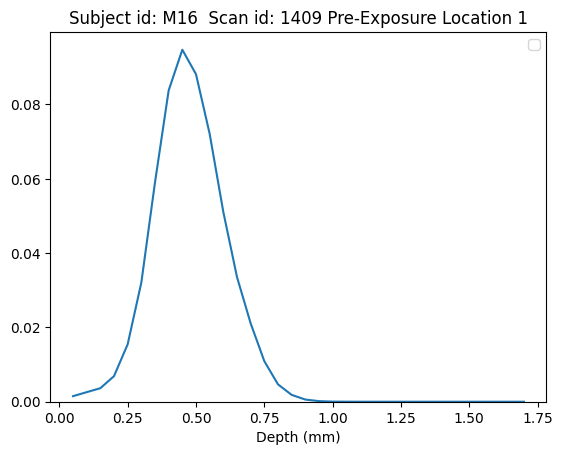

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1409 1 True 0.0947437 False 1


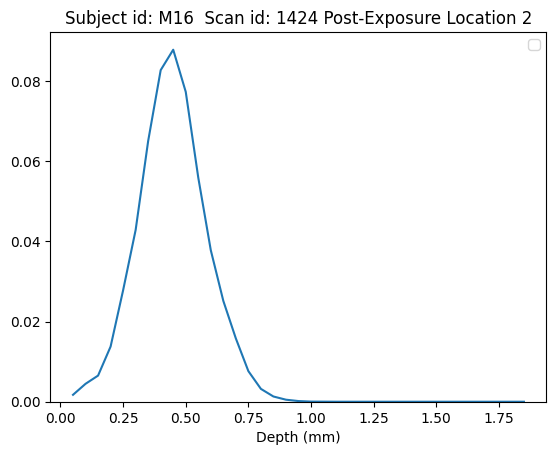

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1424 2 True 0.0877587 True 2


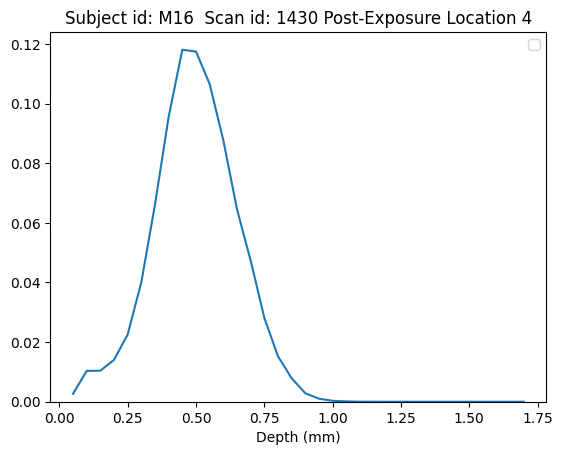

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1430 4 True 0.118057 True 4


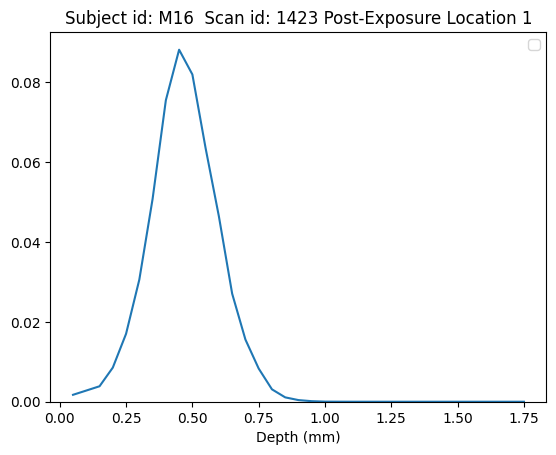

1423 1 True 0.088081 True 1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


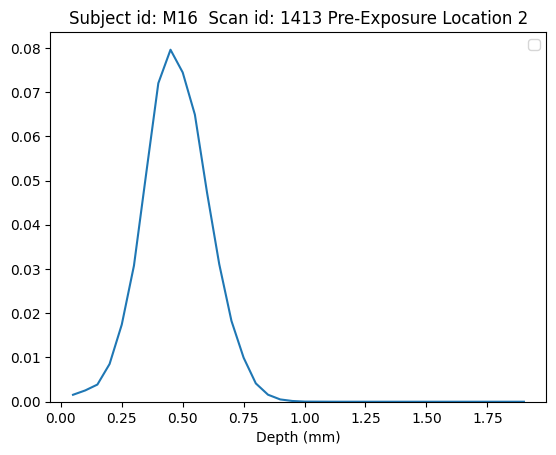

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1413 2 True 0.0795687 False 2


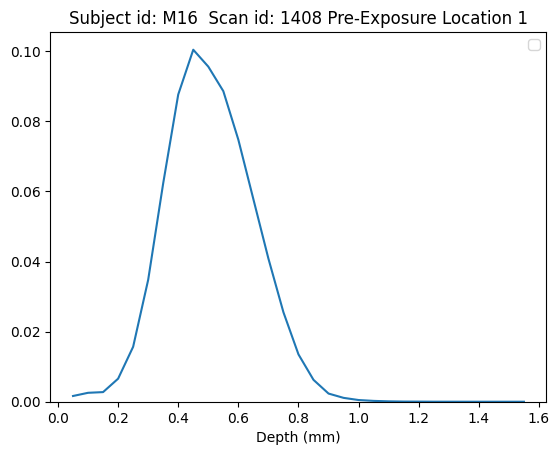

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1408 1 True 0.10043 False 1


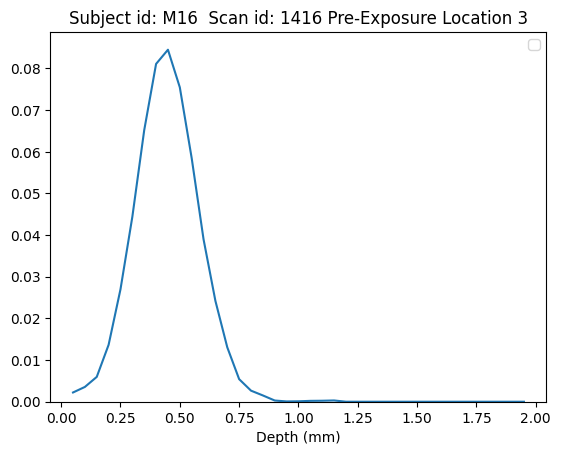

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1416 3 True 0.0845072 False 3


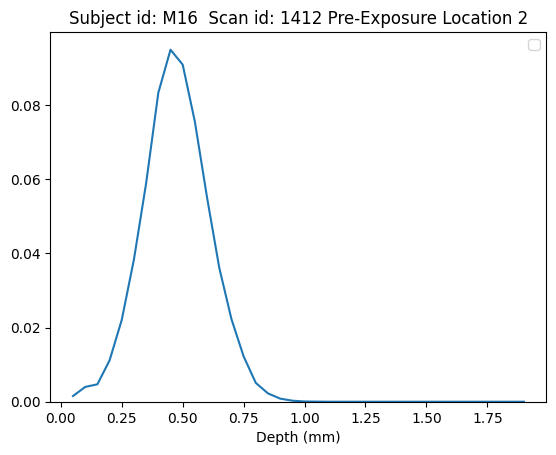

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1412 2 True 0.0948606 False 2


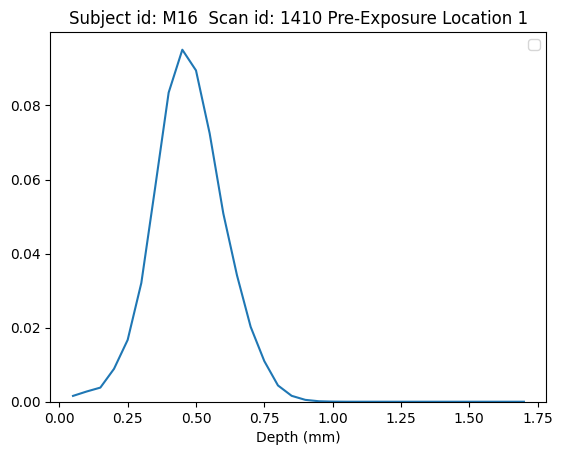

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1410 1 True 0.0950443 False 1


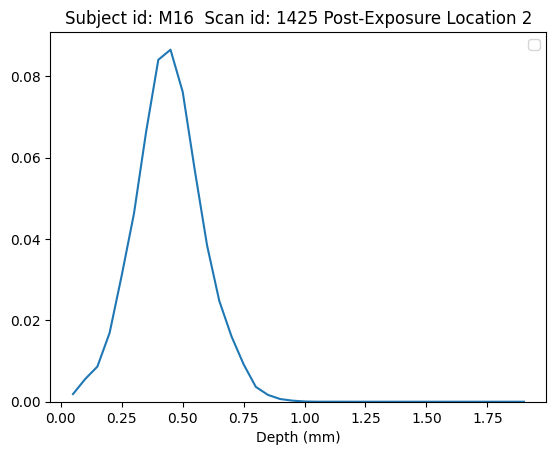

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1425 2 True 0.0865005 True 2


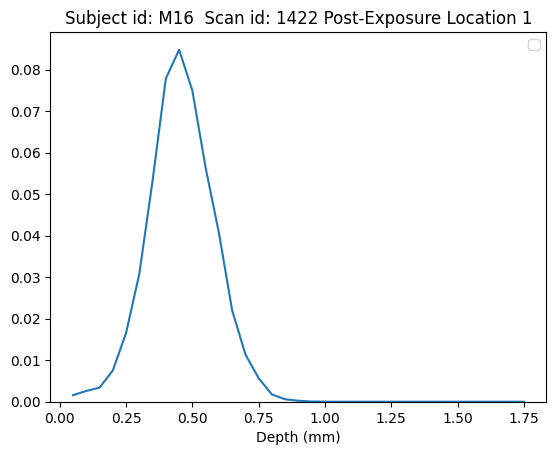

1422 1 True 0.0848125 True 1


In [16]:
import data_read
import importlib
import matplotlib.pyplot as plt
x_vals = []
y_vals = []
colors = []

importlib.reload(data_read)

# Example for Vivosight and Bloodflow Data
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

# For subject ___ - read "bloodflow" data
subject_id = "M16"
subject_data = data_read.process_subject_vivosight_data(subject_id,vivosight_folder,scan_folder, "bloodflow")


# Look at initial visit information
visit_data = subject_data.visit
for blood_data in visit_data.blood_flow:
    blood_data.plot_vascular_density(subject_data.subject_id)
    blood_data.get_max_density()
    print(blood_data.scan_id, blood_data.location, blood_data.return_visit,blood_data.max_density, blood_data.exposed, blood_data.location)

# If the subject had a return visit Look at that too
if subject_data.return_visit is not None:
    visit_data = subject_data.return_visit
    if visit_data.blood_flow is not None:
        for blood_data in visit_data.blood_flow:
            blood_data.plot_vascular_density(subject_data.subject_id)
            blood_data.get_max_density()
            print(blood_data.scan_id, blood_data.location, blood_data.return_visit,blood_data.max_density, blood_data.exposed, blood_data.location)

data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x118ce7560>, <data_types.BloodFlow object at 0x11aecb440>, <data_types.BloodFlow object at 0x11a9b3080>, <data_types.BloodFlow object at 0x11abd15e0>, <data_types.BloodFlow object at 0x11abd3d10>, <data_types.BloodFlow object at 0x11aa00ce0>, <data_types.BloodFlow object at 0x11a8f46e0>, <data_types.BloodFlow object at 0x11abd0530>, <data_types.BloodFlow object at 0x11abd1e50>, <data_types.BloodFlow object at 0x11abd24b0>, <data_types.BloodFlow object at 0x11abd28d0>, <data_types.BloodFlow object at 0x11abd0110>, <data_types.BloodFlow object at 0x11abd3230>, <data_types.BloodFlow object at 0x11abd0410>, <data_types.BloodFlow object at 0x11abd0170>, <data_types.BloodFlow object at 0x11b1a1580>, <data_types.BloodFlow object at 0x11a366990>, <data_types.BloodFlow object at 0x11a364200>, <data_types.BloodFlow object at 0x11b1a0ef0>, <data_types.BloodFlow object at 0x11a8f6600>, <data_types.BloodFlow object at 0x11b1a1070>, <

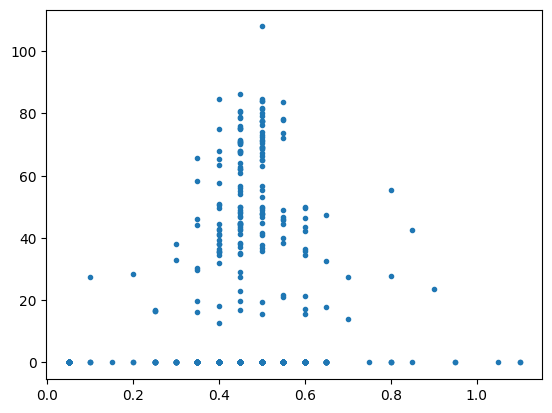

In [17]:
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

#Grab all subject ids
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Store all the data in a dictionary by subject_id
subjects = {}
for subject_id in subject_ids:
    subjects[subject_id] = data_read.process_subject_vivosight_data(subject_id,vivosight_folder,scan_folder, "bloodflow")


max_density = []
depth_at_max_density = []
# Print out data like above but include subject id
for subject_id, subject_data in subjects.items():
    
    # Look at initial visit information
    visit_data = subject_data.visit
    if visit_data.blood_flow is not None:
        for blood_data in visit_data.blood_flow:
            max_density.append(blood_data.get_max_density())
            depth_at_max_density.append(blood_data.get_depth_max_diameter())


    # If the subject had a return visit Look at that too
    if subject_data.return_visit is not None:
        visit_data = subject_data.return_visit
        if visit_data.blood_flow is not None:
            for blood_data in visit_data.blood_flow:
                max_density.append(blood_data.get_max_diameter())
                depth_at_max_density.append(blood_data.get_depth_max_diameter())

plt.plot(depth_at_max_density,max_density,'.')
plt.show()

data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x11a699670>, <data_types.BloodFlow object at 0x11a69aea0>, <data_types.BloodFlow object at 0x11a34ddf0>, <data_types.BloodFlow object at 0x11a34dc10>, <data_types.BloodFlow object at 0x11b374050>, <data_types.BloodFlow object at 0x11b377260>, <data_types.BloodFlow object at 0x11b377560>, <data_types.BloodFlow object at 0x11b375a30>, <data_types.BloodFlow object at 0x11c5f4d70>, <data_types.BloodFlow object at 0x11c5f5940>, <data_types.BloodFlow object at 0x11b375280>, <data_types.BloodFlow object at 0x11c5f4b00>, <data_types.BloodFlow object at 0x11c5f4110>, <data_types.BloodFlow object at 0x11c5f5dc0>, <data_types.BloodFlow object at 0x11a5c4200>, <data_types.BloodFlow object at 0x11a5c5cd0>, <data_types.BloodFlow object at 0x117a679e0>, <data_types.BloodFlow object at 0x119e09b80>, <data_types.BloodFlow object at 0x119d64a10>, <data_types.BloodFlow object at 0x114e3faa0>, <data_types.BloodFlow object at 0x11b06d970>, <

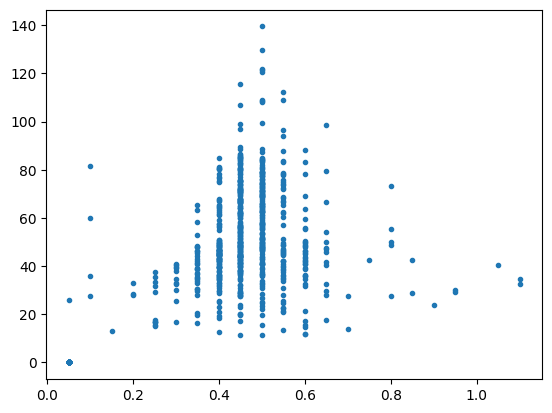

In [19]:
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

#Grab all subject ids
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Store all the data in a dictionary by subject_id
subjects = {}
for subject_id in subject_ids:
    subjects[subject_id] = data_read.process_subject_vivosight_data(subject_id,vivosight_folder,scan_folder, "bloodflow")


max_diameter = []
depth_at_max_diameter = []
# Print out data like above but include subject id
for subject_id, subject_data in subjects.items():
    
    # Look at initial visit information
    visit_data = subject_data.visit
    if visit_data.blood_flow is not None:
        for blood_data in visit_data.blood_flow:
            max_diameter.append(blood_data.get_max_diameter())
            depth_at_max_diameter.append(blood_data.get_depth_max_diameter())


    # If the subject had a return visit Look at that too
    if subject_data.return_visit is not None:
        visit_data = subject_data.return_visit
        if visit_data.blood_flow is not None:
            for blood_data in visit_data.blood_flow:
                max_diameter.append(blood_data.get_max_diameter())
                depth_at_max_diameter.append(blood_data.get_depth_max_diameter())

plt.plot(depth_at_max_diameter,max_diameter,'.')
plt.show()

In [ ]:
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

#Grab all subject ids
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Store all the data in a dictionary by subject_id
subjects = {}
for subject_id in subject_ids:
    subjects[subject_id] = data_read.process_subject_vivosight_data(subject_id,vivosight_folder,scan_folder, "bloodflow")

# Print out data like above but include subject id
for subject_id, subject_data in subjects.items():
    
    # Look at initial visit information
    visit_data = subject_data.visit
    if visit_data.blood_flow is not None:
        for blood_data in visit_data.blood_flow:
            # blood_data.plot_vascular_density(subject_data.subject_id)
            blood_data.get_max_density()
            print(subject_id,"initial",blood_data.scan_id, blood_data.location, blood_data.return_visit,blood_data.max_density, blood_data.exposed, blood_data.location)

    # If the subject had a return visit Look at that too
    if subject_data.return_visit is not None:
        visit_data = subject_data.return_visit
        if visit_data.blood_flow is not None:
            for blood_data in visit_data.blood_flow:
                # blood_data.plot_vascular_density(subject_data.subject_id)
                blood_data.get_max_density()
                print(subject_id,"return",blood_data.scan_id, blood_data.location, blood_data.return_visit,blood_data.max_density, blood_data.exposed, blood_data.location)

data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x1199a0530>, <data_types.BloodFlow object at 0x11a39db80>, <data_types.BloodFlow object at 0x11a39e660>, <data_types.BloodFlow object at 0x11a39e210>, <data_types.BloodFlow object at 0x11a39c500>, <data_types.BloodFlow object at 0x11a3fda30>, <data_types.BloodFlow object at 0x11a3fcef0>, <data_types.BloodFlow object at 0x11a3ffad0>, <data_types.BloodFlow object at 0x11a3ff980>, <data_types.BloodFlow object at 0x11a3fed50>, <data_types.BloodFlow object at 0x11a1898e0>, <data_types.BloodFlow object at 0x11a189c10>, <data_types.BloodFlow object at 0x11a189a90>, <data_types.BloodFlow object at 0x119d7d3a0>, <data_types.BloodFlow object at 0x119d7d0d0>, <data_types.BloodFlow object at 0x11a188c20>, <data_types.BloodFlow object at 0x11a39fbf0>, <data_types.BloodFlow object at 0x11a628c50>, <data_types.BloodFlow object at 0x11a629220>, <data_types.BloodFlow object at 0x11a629b20>, <data_types.BloodFlow object at 0x11a62ac30>, <

data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x11a102f30>, <data_types.BloodFlow object at 0x11a1023c0>, <data_types.BloodFlow object at 0x11a8a1760>, <data_types.BloodFlow object at 0x11a8a3710>, <data_types.BloodFlow object at 0x11a8a10d0>, <data_types.BloodFlow object at 0x11a8a2d80>, <data_types.BloodFlow object at 0x11a21f0e0>, <data_types.BloodFlow object at 0x11a21f080>, <data_types.BloodFlow object at 0x11a21ff50>, <data_types.BloodFlow object at 0x11a1fda60>, <data_types.BloodFlow object at 0x11a3873e0>, <data_types.BloodFlow object at 0x11a129cd0>, <data_types.BloodFlow object at 0x11a12b4d0>, <data_types.BloodFlow object at 0x11a12ac90>, <data_types.BloodFlow object at 0x11a12b470>, <data_types.BloodFlow object at 0x11a12bce0>, <data_types.BloodFlow object at 0x11a129a60>, <data_types.BloodFlow object at 0x1199a0530>, <data_types.BloodFlow object at 0x11a12ae70>, <data_types.BloodFlow object at 0x119b12900>, <data_types.BloodFlow object at 0x119b11280>, <

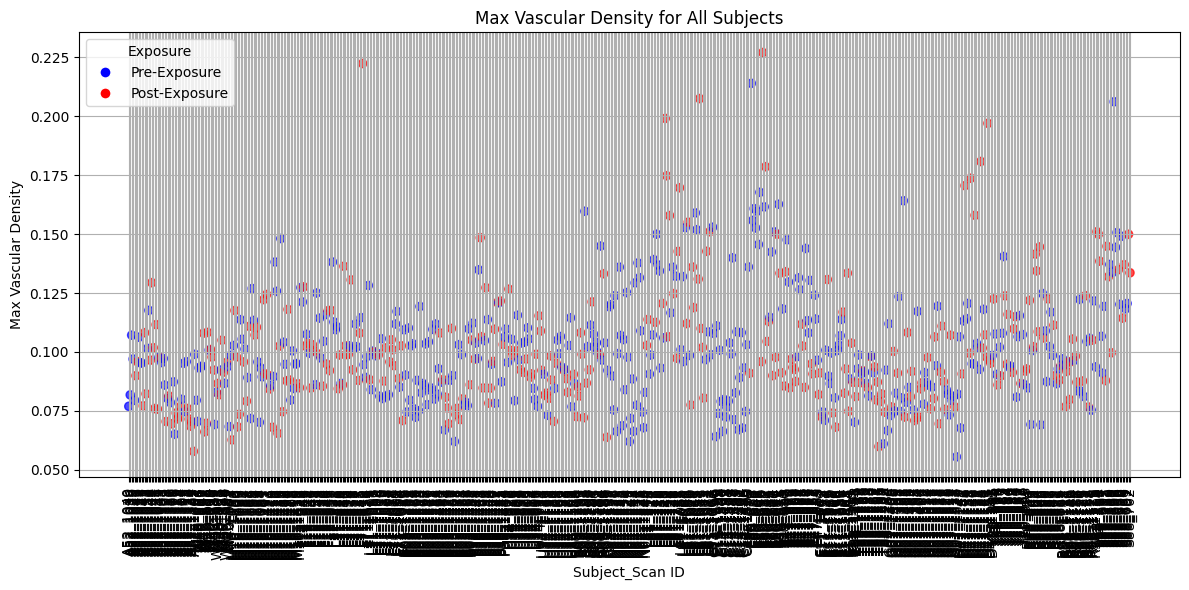

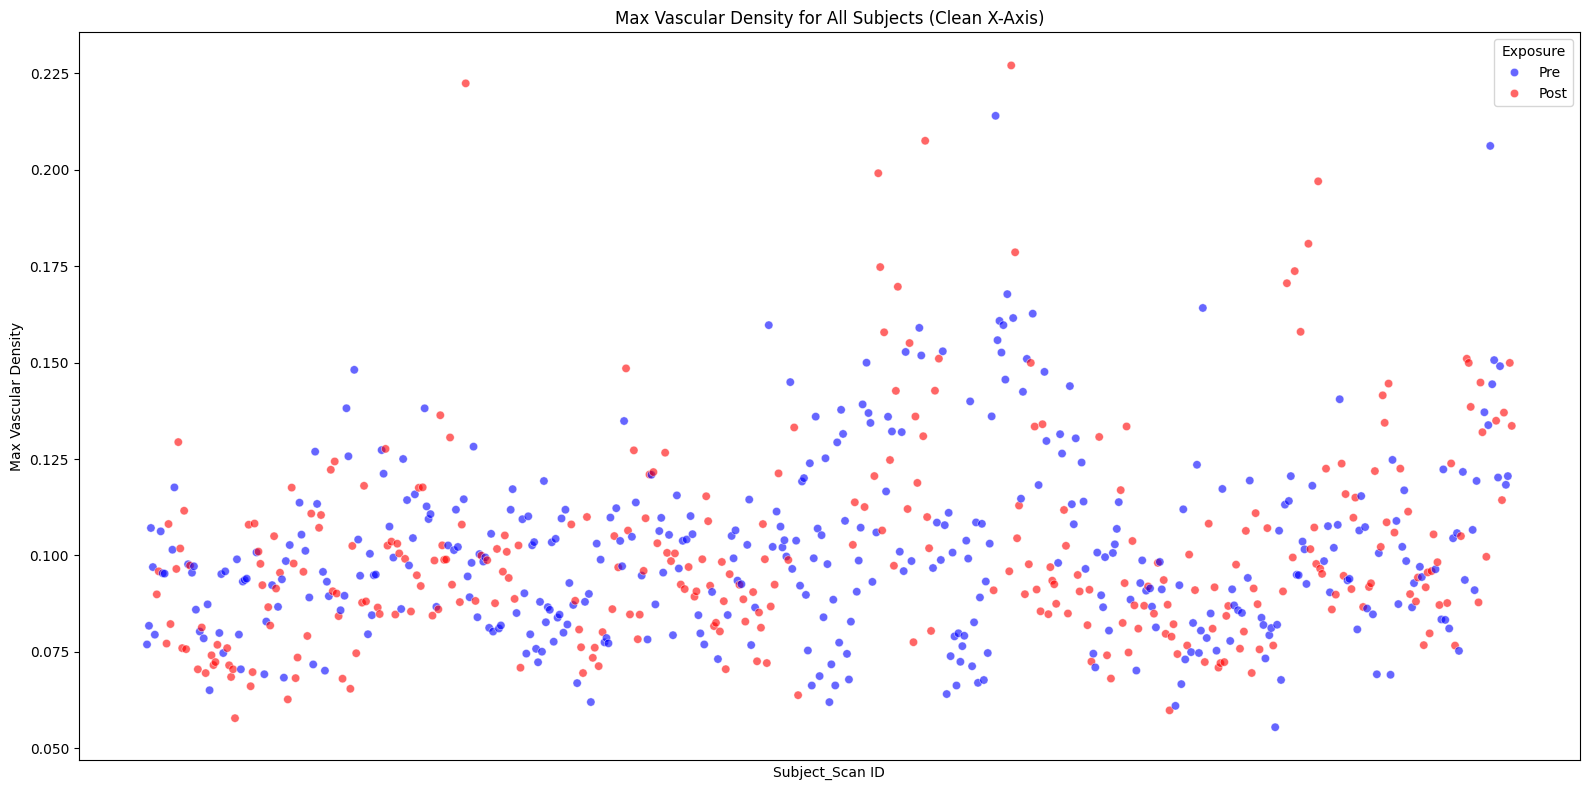

/var/folders/ng/yhkfj4nj4d3fd5tzrk8r9qs80000gn/T/ipykernel_3065/1226928289.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Exposure", y="Max Vascular Density", data=df, palette={"Pre": "blue", "Post": "red"})


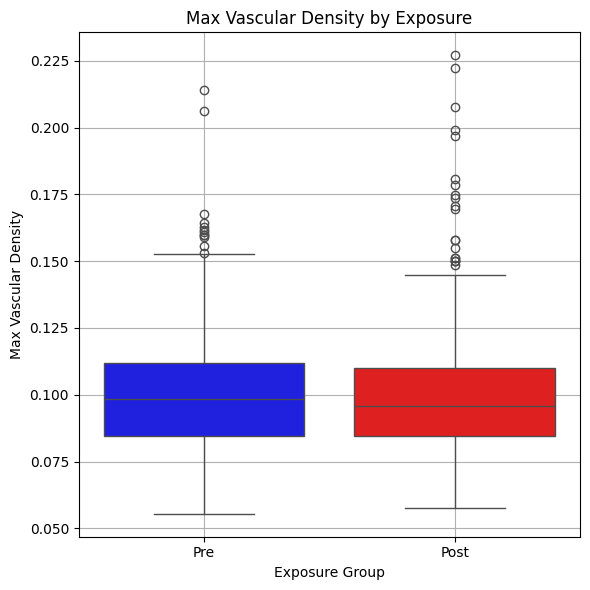

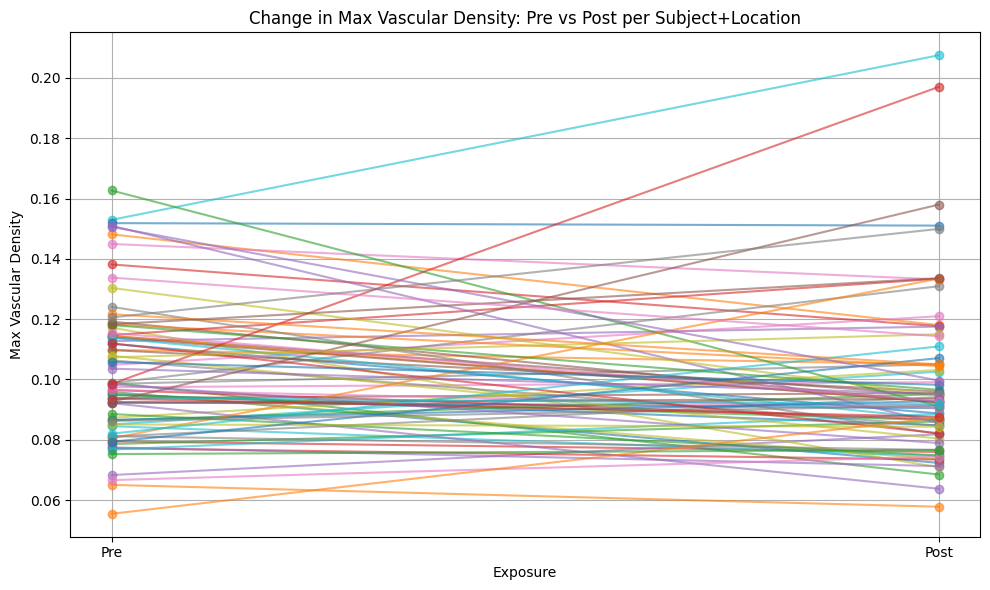

In [ ]:
import data_read
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.lines as mlines

# Set file paths
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

# Get all subject IDs
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Process and store all subject data
subjects = {}
for subject_id in subject_ids:
    subjects[subject_id] = data_read.process_subject_vivosight_data(
        subject_id, vivosight_folder, scan_folder, "bloodflow"
    )

# Initialize lists to store data
scan_labels = []
densities = []
exposures = []
locations = []
subject_ids_list = []
pre_post_dict = {}  

# Extract and print blood flow data
for subject_id, subject_data in subjects.items():
    for visit_type, visit_data in zip(["initial", "return"], [subject_data.visit, subject_data.return_visit]):
        if visit_data is not None and visit_data.blood_flow is not None:
            for blood_data in visit_data.blood_flow:
                blood_data.get_max_density()

                print(subject_id, visit_type, blood_data.scan_id, blood_data.location,
                      blood_data.return_visit, blood_data.max_density, blood_data.exposed)

                label = f"{subject_id}_{blood_data.scan_id}"
                scan_labels.append(label)
                densities.append(blood_data.max_density)
                exposures.append("Post" if blood_data.exposed else "Pre")
                locations.append(blood_data.location)
                subject_ids_list.append(subject_id)

                # Collect pre/post for paired plotting
                key = f"{subject_id}_{blood_data.location}"
                if key not in pre_post_dict:
                    pre_post_dict[key] = {'Pre': None, 'Post': None}
                if blood_data.exposed:
                    pre_post_dict[key]['Post'] = blood_data.max_density
                else:
                    pre_post_dict[key]['Pre'] = blood_data.max_density

# Convert to DataFrame
df = pd.DataFrame({
    "Subject": subject_ids_list,
    "Scan Label": scan_labels,
    "Max Vascular Density": densities,
    "Exposure": exposures,
    "Location": locations,
})

# Scatterplot with full x-axis labels
plt.figure(figsize=(12, 6))
colors = ['red' if exp == 'Post' else 'blue' for exp in df["Exposure"]]
plt.scatter(range(len(df)), df["Max Vascular Density"], c=colors, alpha=0.7)
plt.xticks(ticks=range(len(df)), labels=df["Scan Label"], rotation=90)
plt.xlabel("Subject_Scan ID")
plt.ylabel("Max Vascular Density")
plt.title("Max Vascular Density for All Subjects")
legend_elements = [
    mlines.Line2D([0], [0], marker='o', color='w', label='Pre-Exposure', markerfacecolor='blue', markersize=8),
    mlines.Line2D([0], [0], marker='o', color='w', label='Post-Exposure', markerfacecolor='red', markersize=8)
]
plt.legend(handles=legend_elements, title="Exposure")
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatterplot with clean x-axis (no clutter)
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df,
    x='Scan Label',
    y='Max Vascular Density',
    hue='Exposure',
    palette={'Pre': 'blue', 'Post': 'red'},
    alpha=0.6
)
plt.xticks([], [])  
plt.xlabel("Subject_Scan ID")
plt.ylabel("Max Vascular Density")
plt.title("Max Vascular Density for All Subjects (Clean X-Axis)")
plt.legend(title='Exposure')
plt.tight_layout()
plt.show()

# Boxplot - Pre vs Post Exposure
plt.figure(figsize=(6, 6))
sns.boxplot(x="Exposure", y="Max Vascular Density", data=df, palette={"Pre": "blue", "Post": "red"})
plt.title("Max Vascular Density by Exposure")
plt.xlabel("Exposure Group")
plt.ylabel("Max Vascular Density")
plt.grid(True)
plt.tight_layout()
plt.show()

# Line plot showing pre vs post for each subject-location pair
plt.figure(figsize=(10, 6))
for key, pair in pre_post_dict.items():
    if pair['Pre'] is not None and pair['Post'] is not None:
        plt.plot(['Pre', 'Post'], [pair['Pre'], pair['Post']], marker='o', label=key, alpha=0.6)
plt.xlabel("Exposure")
plt.ylabel("Max Vascular Density")
plt.title("Change in Max Vascular Density: Pre vs Post per Subject+Location")
plt.grid(True)
plt.tight_layout()
plt.show()


data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x11a9de330>, <data_types.BloodFlow object at 0x11aa038c0>, <data_types.BloodFlow object at 0x11b0c7350>, <data_types.BloodFlow object at 0x11a7732c0>, <data_types.BloodFlow object at 0x11a71d100>, <data_types.BloodFlow object at 0x11a71d0a0>, <data_types.BloodFlow object at 0x11a71e360>, <data_types.BloodFlow object at 0x11a71dc70>, <data_types.BloodFlow object at 0x11a71d670>, <data_types.BloodFlow object at 0x11a71e210>, <data_types.BloodFlow object at 0x11b34e990>, <data_types.BloodFlow object at 0x11b34c830>, <data_types.BloodFlow object at 0x11b34d940>, <data_types.BloodFlow object at 0x11a87d2e0>, <data_types.BloodFlow object at 0x11b34e390>, <data_types.BloodFlow object at 0x11b34e870>, <data_types.BloodFlow object at 0x11a1a70b0>, <data_types.BloodFlow object at 0x11b34fd40>, <data_types.BloodFlow object at 0x11b1c8650>, <data_types.BloodFlow object at 0x11b00e2a0>, <data_types.BloodFlow object at 0x11b1cbb30>, <

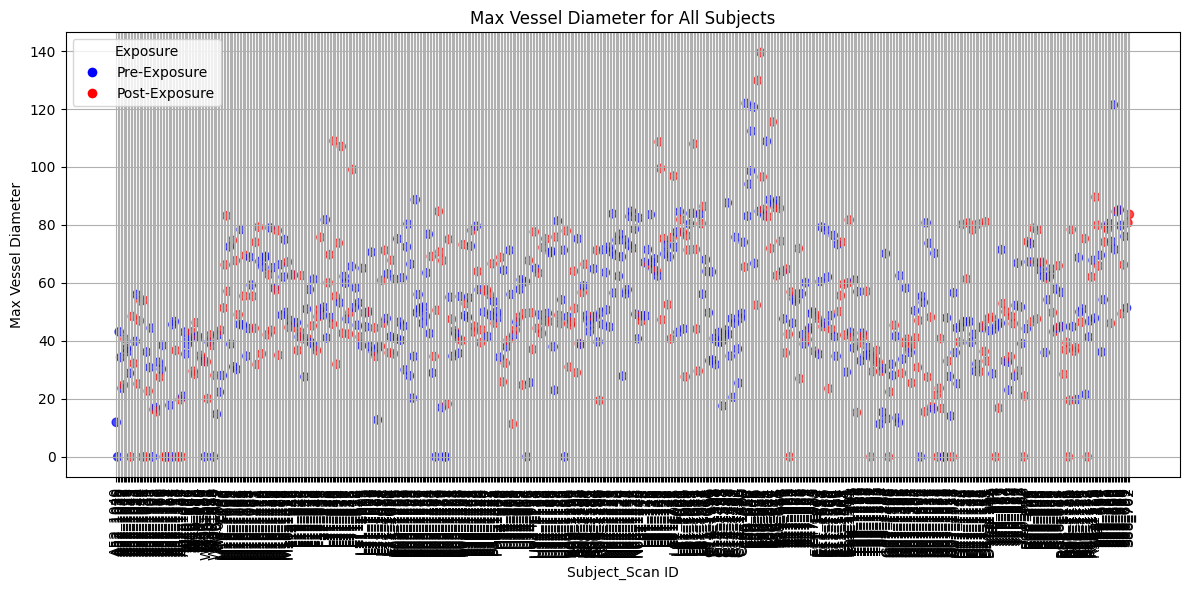

/var/folders/ng/yhkfj4nj4d3fd5tzrk8r9qs80000gn/T/ipykernel_3065/2863254887.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Exposure", y="Max Vessel Diameter", data=df, palette={"Pre": "blue", "Post": "red"})


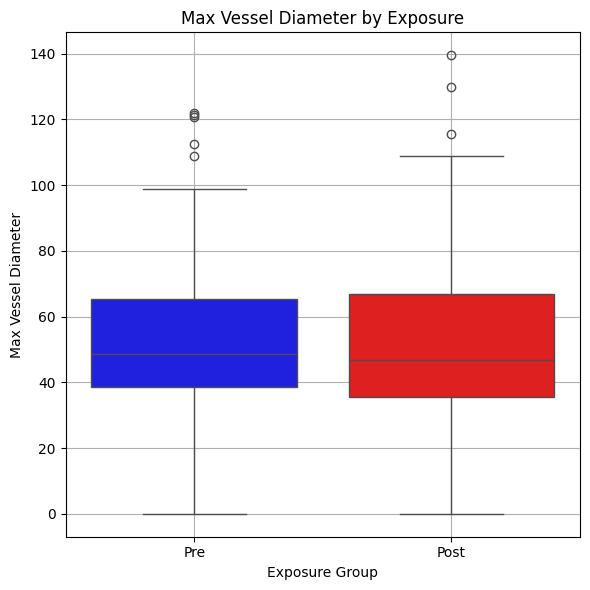

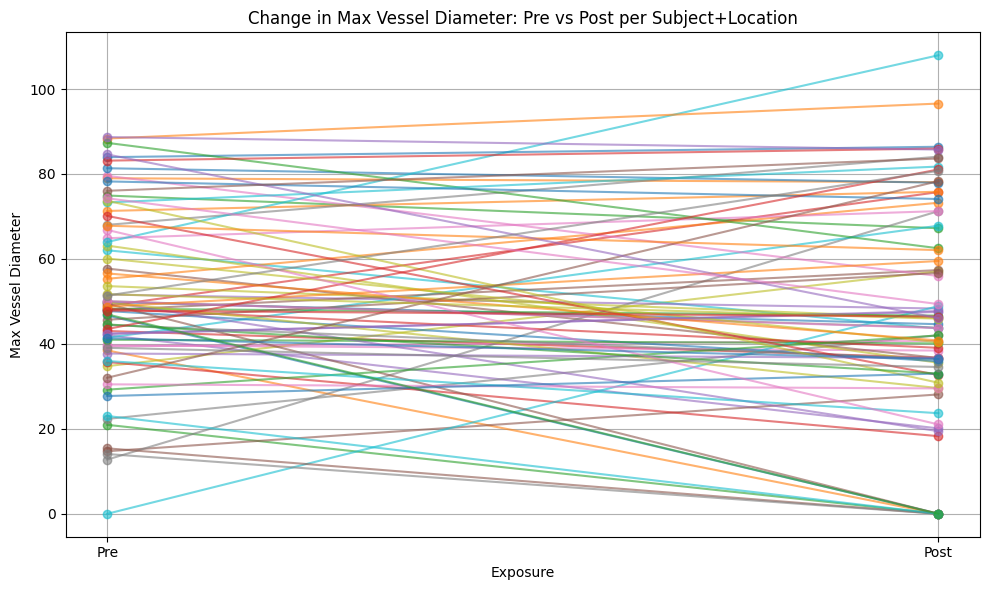

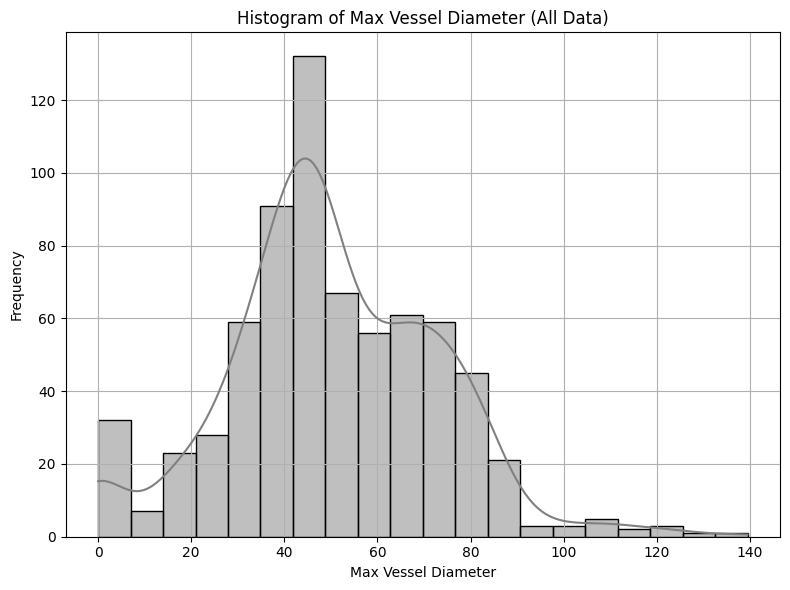

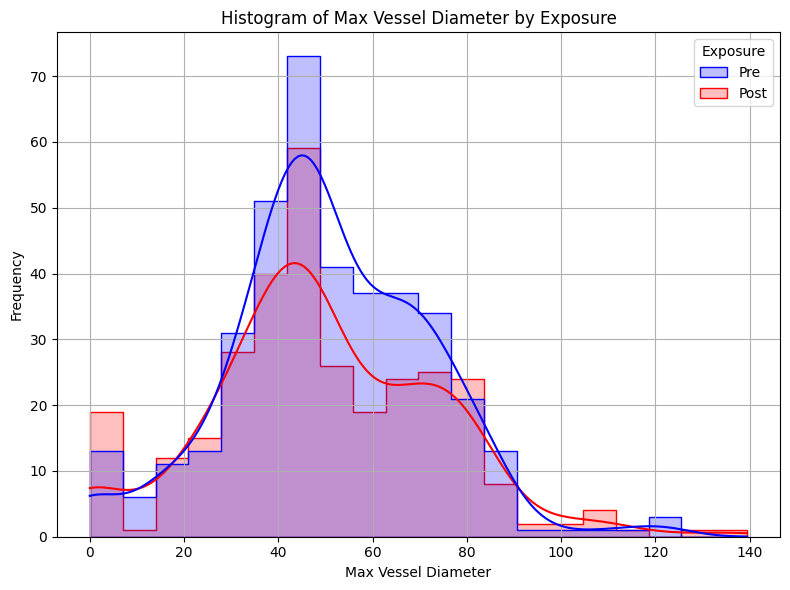

In [20]:
import data_read
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.lines as mlines

# Set file paths
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

# Get all subject IDs
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Process and store all subject data
subjects = {}
for subject_id in subject_ids:
    subjects[subject_id] = data_read.process_subject_vivosight_data(
        subject_id, vivosight_folder, scan_folder, "bloodflow"
    )

# Initialize lists to store data
scan_labels = []
diameters = []
exposures = []
locations = []
subject_ids_list = []
pre_post_dict = {}  # For optional pre-post line plot

# Extract and print blood flow data
for subject_id, subject_data in subjects.items():
    for visit_type, visit_data in zip(["initial", "return"], [subject_data.visit, subject_data.return_visit]):
        if visit_data is not None and visit_data.blood_flow is not None:
            for blood_data in visit_data.blood_flow:
                blood_data.get_max_diameter()

                print(subject_id, visit_type, blood_data.scan_id, blood_data.location,
                      blood_data.return_visit, blood_data.max_diameter, blood_data.exposed)

                label = f"{subject_id}_{blood_data.scan_id}"
                scan_labels.append(label)
                diameters.append(blood_data.max_diameter)
                exposures.append("Post" if blood_data.exposed else "Pre")
                locations.append(blood_data.location)
                subject_ids_list.append(subject_id)

                # Collect pre/post for paired plotting
                key = f"{subject_id}_{blood_data.location}"
                if key not in pre_post_dict:
                    pre_post_dict[key] = {'Pre': None, 'Post': None}
                if blood_data.exposed:
                    pre_post_dict[key]['Post'] = blood_data.max_diameter
                else:
                    pre_post_dict[key]['Pre'] = blood_data.max_diameter

# Step 5: Convert to DataFrame
df = pd.DataFrame({
    "Subject": subject_ids_list,
    "Scan Label": scan_labels,
    "Max Vessel Diameter": diameters,
    "Exposure": exposures,
    "Location": locations,
})

# Scatterplot with full x-axis labels
plt.figure(figsize=(12, 6))
colors = ['red' if exp == 'Post' else 'blue' for exp in df["Exposure"]]
plt.scatter(range(len(df)), df["Max Vessel Diameter"], c=colors, alpha=0.7)
plt.xticks(ticks=range(len(df)), labels=df["Scan Label"], rotation=90)
plt.xlabel("Subject_Scan ID")
plt.ylabel("Max Vessel Diameter")
plt.title("Max Vessel Diameter for All Subjects")
legend_elements = [
    mlines.Line2D([0], [0], marker='o', color='w', label='Pre-Exposure', markerfacecolor='blue', markersize=8),
    mlines.Line2D([0], [0], marker='o', color='w', label='Post-Exposure', markerfacecolor='red', markersize=8)
]
plt.legend(handles=legend_elements, title="Exposure")
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot - Pre vs Post Exposure
plt.figure(figsize=(6, 6))
sns.boxplot(x="Exposure", y="Max Vessel Diameter", data=df, palette={"Pre": "blue", "Post": "red"})
plt.title("Max Vessel Diameter by Exposure")
plt.xlabel("Exposure Group")
plt.ylabel("Max Vessel Diameter")
plt.grid(True)
plt.tight_layout()
plt.show()

# Line plot showing pre vs post for each subject-location pair
plt.figure(figsize=(10, 6))
for key, pair in pre_post_dict.items():
    if pair['Pre'] is not None and pair['Post'] is not None:
        plt.plot(['Pre', 'Post'], [pair['Pre'], pair['Post']], marker='o', label=key, alpha=0.6)
plt.xlabel("Exposure")
plt.ylabel("Max Vessel Diameter")
plt.title("Change in Max Vessel Diameter: Pre vs Post per Subject+Location")
plt.grid(True)
plt.tight_layout()
plt.show()

#Histogram of Max Vessel diameter

# Combined histogram
plt.figure(figsize=(8, 6))
sns.histplot(df["Max Vessel Diameter"], bins=20, kde=True, color='gray')
plt.title("Histogram of Max Vessel Diameter (All Data)")
plt.xlabel("Max Vessel Diameter")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Separated histograms by Exposure
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Max Vessel Diameter", hue="Exposure", bins=20, kde=True,
             palette={"Pre": "blue", "Post": "red"}, element="step", stat="count", common_norm=False)
plt.title("Histogram of Max Vessel Diameter by Exposure")
plt.xlabel("Max Vessel Diameter")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x11a4adc10>, <data_types.BloodFlow object at 0x11b67a3c0>, <data_types.BloodFlow object at 0x11b6097c0>, <data_types.BloodFlow object at 0x11ab6e210>, <data_types.BloodFlow object at 0x11ab6e450>, <data_types.BloodFlow object at 0x11ab6d9d0>, <data_types.BloodFlow object at 0x11ab6d8e0>, <data_types.BloodFlow object at 0x11ab6d580>, <data_types.BloodFlow object at 0x11ab6f980>, <data_types.BloodFlow object at 0x11ab6c350>, <data_types.BloodFlow object at 0x11ab6fd40>, <data_types.BloodFlow object at 0x11ab6d190>, <data_types.BloodFlow object at 0x11ab6ffb0>, <data_types.BloodFlow object at 0x11ab6d280>, <data_types.BloodFlow object at 0x11ab6ff50>, <data_types.BloodFlow object at 0x11ab6ce90>, <data_types.BloodFlow object at 0x11b5ed880>, <data_types.BloodFlow object at 0x10705a480>, <data_types.BloodFlow object at 0x11a8ea2a0>, <data_types.BloodFlow object at 0x11a8e9fd0>, <data_types.BloodFlow object at 0x11a8ea840>, <

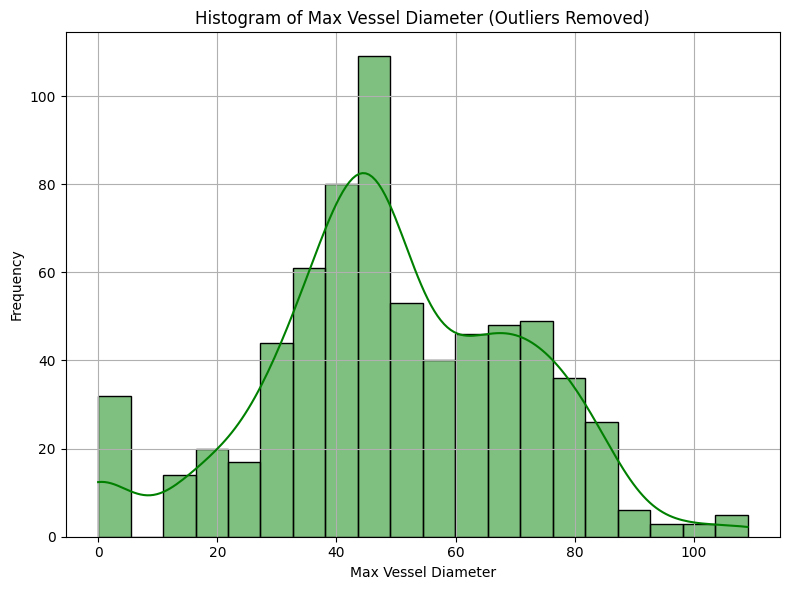

In [ ]:
import data_read
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Paths
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

# Step 1: Collect data
subject_ids = data_read.get_all_subject_ids(vivosight_folder)
subjects = {}

scan_labels = []
diameters = []
exposures = []
locations = []
subject_ids_list = []

for subject_id in subject_ids:
    subject = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "bloodflow")
    subjects[subject_id] = subject

    for visit in [subject.visit, subject.return_visit]:
        if visit and visit.blood_flow:
            for blood_data in visit.blood_flow:
                blood_data.get_max_diameter()
                scan_labels.append(f"{subject_id}_{blood_data.scan_id}")
                diameters.append(blood_data.max_diameter)
                exposures.append("Post" if blood_data.exposed else "Pre")
                locations.append(blood_data.location)
                subject_ids_list.append(subject_id)


# Step 2: Create DataFrame
df = pd.DataFrame({
    "Subject": subject_ids_list,
    "Scan Label": scan_labels,
    "Max Vessel Diameter": diameters,
    "Exposure": exposures,
    "Location": locations,
})

# Step 3: Identify and remove outliers
Q1 = df["Max Vessel Diameter"].quantile(0.25)
Q3 = df["Max Vessel Diameter"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Max Vessel Diameter"] < lower_bound) | (df["Max Vessel Diameter"] > upper_bound)]

print("Outliers detected:")
for _, row in outliers.iterrows():
    print(
        f"Subject: {row['Subject']}, Scan ID: {row['Scan Label'].split('_')[1]}, "
        f"Location: {row['Location']}, Return Visit: {'Yes' if '_2' in row['Scan Label'] else 'No'}, "
        f"Max Diameter: {row['Max Vessel Diameter']:.2f}, Exposure: {row['Exposure']}"
    )

# Step 4: Filter out outliers
df_clean = df[
    (df["Max Vessel Diameter"] >= lower_bound) &
    (df["Max Vessel Diameter"] <= upper_bound)
]

# Step 5: Plot histogram without outliers
plt.figure(figsize=(8, 6))
sns.histplot(df_clean["Max Vessel Diameter"], bins=20, kde=True, color='green')
plt.title("Histogram of Max Vessel Diameter (Outliers Removed)")
plt.xlabel("Max Vessel Diameter")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#normality test (shows data is NOT a normal distribution)
from scipy.stats import shapiro

stat, p = shapiro(df_clean["Max Vessel Diameter"])
print(f"Shapiro-Wilk p-value = {p}")

Shapiro-Wilk p-value = 6.711139898963501e-07


The distributions of max vessel diameter in the full and cleaned datasets are not significantly different. (Mann Whitney test) not normally distributed data

In [ ]:
import data_read
import pandas as pd
import numpy as np

# Set file paths
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

# Collect data
subject_ids = data_read.get_all_subject_ids(vivosight_folder)
subjects = {}

scan_labels = []
diameters = []
exposures = []
locations = []
subject_ids_list = []

for subject_id in subject_ids:
    subject = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "bloodflow")
    subjects[subject_id] = subject

    for visit in [subject.visit, subject.return_visit]:
        if visit and visit.blood_flow:
            for blood_data in visit.blood_flow:
                blood_data.get_max_diameter()
                scan_labels.append(f"{subject_id}_{blood_data.scan_id}")
                diameters.append(blood_data.max_diameter)
                exposures.append("Post" if blood_data.exposed else "Pre")
                locations.append(blood_data.location)
                subject_ids_list.append(subject_id)

# Create full DataFrame
df = pd.DataFrame({
    "Subject": subject_ids_list,
    "Scan Label": scan_labels,
    "Max Vessel Diameter": diameters,
    "Exposure": exposures,
    "Location": locations,
})

# Remove outliers using IQR
Q1 = df["Max Vessel Diameter"].quantile(0.25)
Q3 = df["Max Vessel Diameter"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[
    (df["Max Vessel Diameter"] >= lower_bound) &
    (df["Max Vessel Diameter"] <= upper_bound)
]

from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

print("Shapiro-Wilk Test (Original):", shapiro(df["Max Vessel Diameter"]))
print("Shapiro-Wilk Test (Cleaned):", shapiro(df_clean["Max Vessel Diameter"]))

levene_stat, levene_p = levene(df["Max Vessel Diameter"], df_clean["Max Vessel Diameter"])
print(f"Levene's test p-value: {levene_p}")

u_stat, u_p = mannwhitneyu(df["Max Vessel Diameter"], df_clean["Max Vessel Diameter"], alternative='two-sided')
print(f"Mann-Whitney U test p-value: {u_p}")

from scipy.stats import shapiro, mannwhitneyu

# Split the cleaned data into Pre and Post groups
pre = df_clean[df_clean["Exposure"] == "Pre"]["Max Vessel Diameter"]
post = df_clean[df_clean["Exposure"] == "Post"]["Max Vessel Diameter"]

# Shapiro-Wilk Normality Test (again, for both groups)
print("Shapiro-Wilk Test - Pre Exposure:", shapiro(pre))
print("Shapiro-Wilk Test - Post Exposure:", shapiro(post))

# Mann-Whitney U Test (non-parametric comparison)
stat, p = mannwhitneyu(pre, post, alternative='two-sided')
print(f"\nMann-Whitney U test p-value: {p}")


data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x11a436600>, <data_types.BloodFlow object at 0x11a9f7ad0>, <data_types.BloodFlow object at 0x11b456330>, <data_types.BloodFlow object at 0x11a98fb30>, <data_types.BloodFlow object at 0x11a98e120>, <data_types.BloodFlow object at 0x11a98fd10>, <data_types.BloodFlow object at 0x11a98f2f0>, <data_types.BloodFlow object at 0x11a98d9a0>, <data_types.BloodFlow object at 0x11a98c950>, <data_types.BloodFlow object at 0x11a98c890>, <data_types.BloodFlow object at 0x11a98d280>, <data_types.BloodFlow object at 0x11a98f6e0>, <data_types.BloodFlow object at 0x11a915910>, <data_types.BloodFlow object at 0x11a806a20>, <data_types.BloodFlow object at 0x11a915040>, <data_types.BloodFlow object at 0x11a9f7440>, <data_types.BloodFlow object at 0x119ec7170>, <data_types.BloodFlow object at 0x11a9140b0>, <data_types.BloodFlow object at 0x11a915d30>, <data_types.BloodFlow object at 0x11a915730>, <data_types.BloodFlow object at 0x11a9153d0>, <

The Shapiro-Wilk Test results show that both the original and cleaned data, as well as the pre and post-exposure data, are not normally distributed.

Levene's Test indicates that the variances of the groups are equal.

The Mann-whitney U Test shows that there is no significant difference between the pre and post-exposure data - the data distributions for these two groups are not significantly different.

/var/folders/ng/yhkfj4nj4d3fd5tzrk8r9qs80000gn/T/ipykernel_3065/1166987165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Max Vessel Diameter"] = df_clean["Max Vessel Diameter"].clip(lower=0)
/var/folders/ng/yhkfj4nj4d3fd5tzrk8r9qs80000gn/T/ipykernel_3065/1166987165.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x="Exposure", y="Max Vessel Diameter", palette={"Pre": "blue", "Post": "red"})


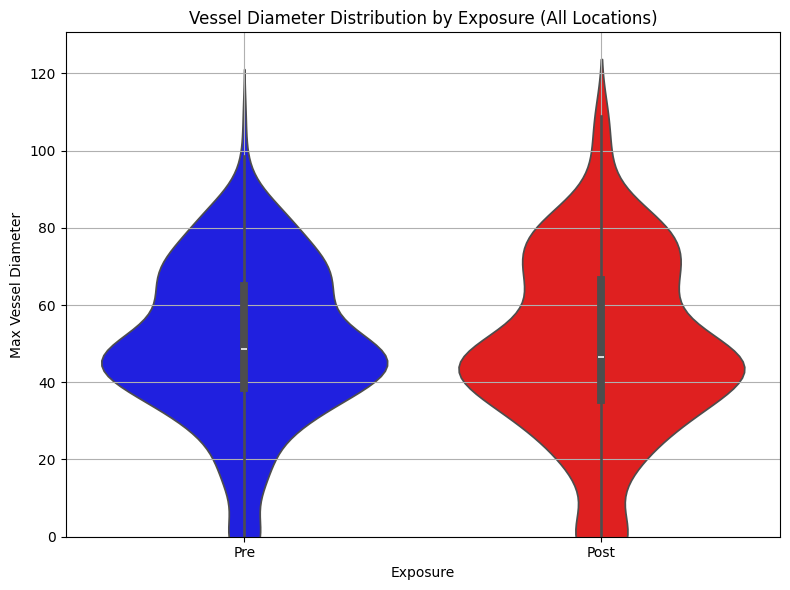

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clip Max Vessel Diameter to ensure no negative values
df_clean["Max Vessel Diameter"] = df_clean["Max Vessel Diameter"].clip(lower=0)

# Create the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_clean, x="Exposure", y="Max Vessel Diameter", palette={"Pre": "blue", "Post": "red"})

# Dynamically adjust y-axis limits based on the data
plt.ylim(bottom=0)  # Ensure y-axis starts at 0
plt.title("Vessel Diameter Distribution by Exposure (All Locations)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import wilcoxon

# 1. Create a pivoted table with paired Pre/Post by Subject+Location
paired_data = df_clean.pivot_table(
    index=["Subject", "Location"],
    columns="Exposure",
    values="Max Vessel Diameter"
).dropna()

# 2. Run Wilcoxon signed-rank test (non-parametric paired test)
stat, p = wilcoxon(paired_data["Pre"], paired_data["Post"])
print(f"Wilcoxon signed-rank test p-value (paired Pre vs Post): {p}")

Wilcoxon signed-rank test p-value (paired Pre vs Post): 0.5435324511073372


Indexing by subject and location and columns are split into "pre" and "post" based on the Exposure column.

Values are the "Max Vessel Diameter" for each subject-location pair

non-parametric test used to compare two related samples - pre and post exposure measurements for the same subject-location pair

p-value is greater than 0.05, we fail to reject the null hypothesis. This suggests that there is no statistically significant difference between the pre-exposure and post-exposure max vessel diameter values for the subject-location pairs. (for all data)

** need to do for return participants 

In [ ]:
from scipy.stats import kruskal

groups = [group["Max Vessel Diameter"].values for _, group in df_clean.groupby("Location")]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test across locations (all data): p = {p}")

Kruskal-Wallis test across locations (all data): p = 0.016876497327329428


kruskal-wallis test compares the distributions of Max Vessel Diameter across multiple groups (locations)

p value of 0.01687.. is less than 0.05, we reject the null hypothesis. This indicates that there is a significant difference in the Max Vessel Diameter across the different locations

In [ ]:
# Count valid pairs (same subject and location, both pre and post available)
paired_data = df_clean.pivot_table(
    index=["Subject", "Location"],
    columns="Exposure",
    values="Max Vessel Diameter"
).dropna()

print(f" Number of valid paired Pre/Post measurements: {len(paired_data)}")

 Number of valid paired Pre/Post measurements: 73


In [ ]:
# comparisons by location and by pre and post data
import data_read
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# File paths
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

# Step 1: Initialize collection
subject_ids = data_read.get_all_subject_ids(vivosight_folder)
data = {
    "Subject": [],
    "Scan ID": [],
    "Location ID": [],
    "Exposure": [],
    "Max Vessel Diameter": [],
}

# Step 2: Use process_subject_vivosight_data to get structured info
for subject_id in subject_ids:
    subject = data_read.process_subject_vivosight_data(
        subject_id, vivosight_folder, scan_folder, "bloodflow"
    )

    for visit in [subject.visit, subject.return_visit]:
        if visit and visit.blood_flow:
            # Recalculate min_location_id

            for blood_data in visit.blood_flow:
                blood_data.get_max_diameter()
                # print("check",blood_data.location)

                data["Subject"].append(subject_id)
                data["Scan ID"].append(blood_data.scan_id)
                data["Location ID"].append(blood_data.location)
                data["Exposure"].append("Post" if blood_data.exposed else "Pre")
                data["Max Vessel Diameter"].append(blood_data.max_diameter)

# Create DataFrame
df = pd.DataFrame(data)

# Remove outliers (IQR method)
Q1 = df["Max Vessel Diameter"].quantile(0.25)
Q3 = df["Max Vessel Diameter"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[
    (df["Max Vessel Diameter"] >= lower_bound) &
    (df["Max Vessel Diameter"] <= upper_bound)
]

# Step 5: Run Mann-Whitney U test for Pre vs Post per location
print("Mann-Whitney U Test: Pre vs Post by Location\n")

for loc in [1, 2, 3, 4]:
    pre = df_clean[(df_clean["Location ID"] == loc) & (df_clean["Exposure"] == "Pre")]["Max Vessel Diameter"]
    post = df_clean[(df_clean["Location ID"] == loc) & (df_clean["Exposure"] == "Post")]["Max Vessel Diameter"]

    print(f" Location {loc}:")
    print(f"   Pre (n={len(pre)}), Post (n={len(post)})")

    if len(pre) >= 3 and len(post) >= 3:
        stat, p = mannwhitneyu(pre, post, alternative='two-sided')
        sig = " Significant" if p < 0.05 else "Not significant"
        print(f"   Mann-Whitney U p-value = {p:.4f} → {sig}\n")
    else:
        print("    Not enough data to compare\n")

data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x11b20d130>, <data_types.BloodFlow object at 0x11a1b8590>, <data_types.BloodFlow object at 0x11b20ee10>, <data_types.BloodFlow object at 0x11a8047a0>, <data_types.BloodFlow object at 0x11a4f67b0>, <data_types.BloodFlow object at 0x11a4f4530>, <data_types.BloodFlow object at 0x11a4f71a0>, <data_types.BloodFlow object at 0x11a4f6f90>, <data_types.BloodFlow object at 0x11ab92210>, <data_types.BloodFlow object at 0x11b39a240>, <data_types.BloodFlow object at 0x11b3c7740>, <data_types.BloodFlow object at 0x11b3c61e0>, <data_types.BloodFlow object at 0x11b456300>, <data_types.BloodFlow object at 0x11a1b4f80>, <data_types.BloodFlow object at 0x11a1b4a40>, <data_types.BloodFlow object at 0x11b0a3d70>, <data_types.BloodFlow object at 0x11b1b56d0>, <data_types.BloodFlow object at 0x11b420d40>, <data_types.BloodFlow object at 0x11b421c10>, <data_types.BloodFlow object at 0x11af6e450>, <data_types.BloodFlow object at 0x11af6fef0>, <

Determine whether there are significant changes in the max vessel diameter between pre and post exposure at each location independently.

In [ ]:
#checking to see if its actually reading in the location id's
import data_read

vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

subject_ids = data_read.get_all_subject_ids(vivosight_folder)

print(" Locations extracted by subject and scan:")

for subject_id in subject_ids:
    subject = data_read.process_subject_vivosight_data(
        subject_id, vivosight_folder, scan_folder, "bloodflow"
    )

    for visit_type, visit in zip(["initial", "return"], [subject.visit, subject.return_visit]):
        if visit and visit.blood_flow:
            for blood_data in visit.blood_flow:
                print(f"  - Scan ID: {blood_data.scan_id} | Mapped Location ID: {blood_data.location} | Exposure: {'Post' if blood_data.exposed else 'Pre'}")

 Locations extracted by subject and scan:
A52 1256.0 1260 4
A52 1256.0 1260 4
A52 1256.0 1259 3
A52 1256.0 1258 2
A52 1256.0 1257 1
A52 1256.0 1260 4
A52 1256.0 1257 1
A52 1256.0 1259 3
A52 1256.0 1257 1
A52 1256.0 1260 4
A52 1256.0 1260 4
A52 1256.0 1258 2
A52 1256.0 1257 1
A52 1256.0 1257 1
A52 1256.0 1258 2
A52 1256.0 1259 3
A52 1256.0 1258 2
A52 1256.0 1257 1
A52 1256.0 1260 4
A52 1256.0 1258 2
A52 1256.0 1259 3
A52 1256.0 1258 2
A52 1256.0 1259 3
A52 1256.0 1259 3
data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x1578d1fa0>, <data_types.BloodFlow object at 0x16a0b9070>, <data_types.BloodFlow object at 0x157fbe4b0>, <data_types.BloodFlow object at 0x178b03a10>, <data_types.BloodFlow object at 0x178b03830>, <data_types.BloodFlow object at 0x178b03fb0>, <data_types.BloodFlow object at 0x157ed86b0>, <data_types.BloodFlow object at 0x157edac30>, <data_types.BloodFlow object at 0x178b02b10>, <data_types.BloodFlow object at 0x178b03110>, <data_types.BloodFlow object at 0

UnboundLocalError: cannot access local variable 'before_exposure_data' where it is not associated with a value

8


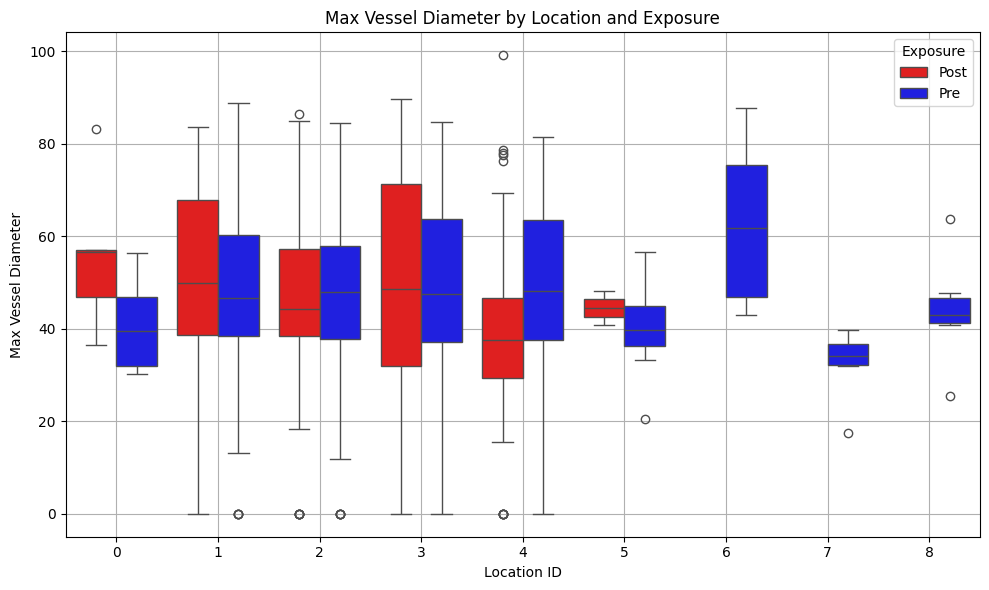

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


print(df_clean["Location ID"].max())

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_clean,
    x="Location ID",
    y="Max Vessel Diameter",
    hue="Exposure",
    palette={"Pre": "blue", "Post": "red"}
)

plt.title("Max Vessel Diameter by Location and Exposure")
plt.xlabel("Location ID")
plt.ylabel("Max Vessel Diameter")
plt.grid(True)
plt.tight_layout()
plt.show()

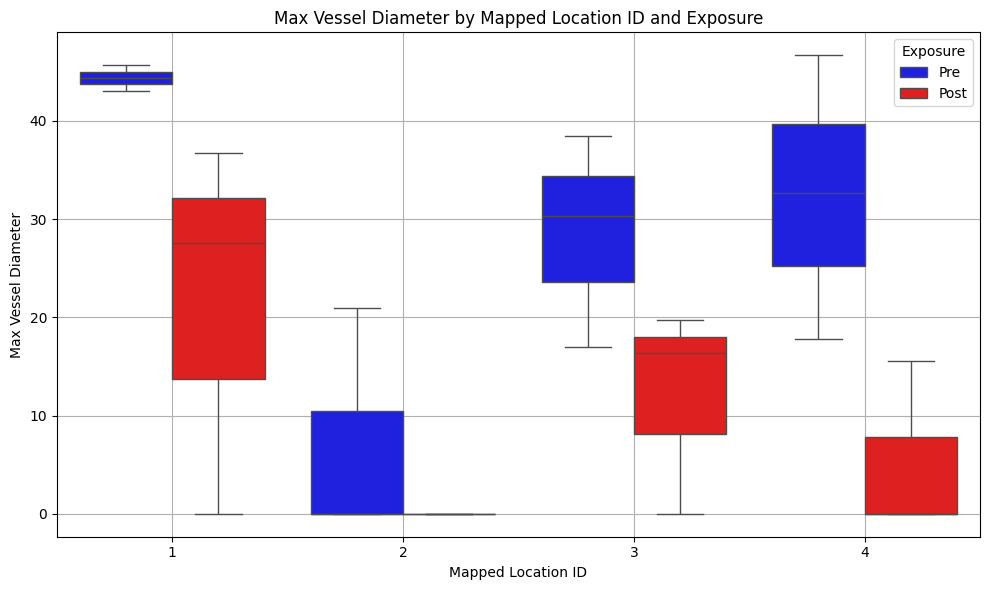

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_clean,
    x="Location ID",
    y="Max Vessel Diameter",
    hue="Exposure",
    palette={"Pre": "blue", "Post": "red"}
)

plt.title("Max Vessel Diameter by Mapped Location ID and Exposure")
plt.xlabel("Mapped Location ID")
plt.ylabel("Max Vessel Diameter")
plt.grid(True)
plt.tight_layout()
plt.show()

data/Vivosight_data/A52_Results [<data_types.BloodFlow object at 0x1200ed100>, <data_types.BloodFlow object at 0x120565250>, <data_types.BloodFlow object at 0x11fe31bb0>, <data_types.BloodFlow object at 0x1207ee270>, <data_types.BloodFlow object at 0x120100350>, <data_types.BloodFlow object at 0x120100410>, <data_types.BloodFlow object at 0x1201016a0>, <data_types.BloodFlow object at 0x120103650>, <data_types.BloodFlow object at 0x11fb2b920>, <data_types.BloodFlow object at 0x11c865070>, <data_types.BloodFlow object at 0x11ffb9100>, <data_types.BloodFlow object at 0x11f94ac90>, <data_types.BloodFlow object at 0x11e9726f0>, <data_types.BloodFlow object at 0x11fff45f0>, <data_types.BloodFlow object at 0x11ff4bcb0>, <data_types.BloodFlow object at 0x120565c40>, <data_types.BloodFlow object at 0x11ff6ecf0>, <data_types.BloodFlow object at 0x12063f860>, <data_types.BloodFlow object at 0x12063c320>, <data_types.BloodFlow object at 0x120a27950>, <data_types.BloodFlow object at 0x120a26930>, <

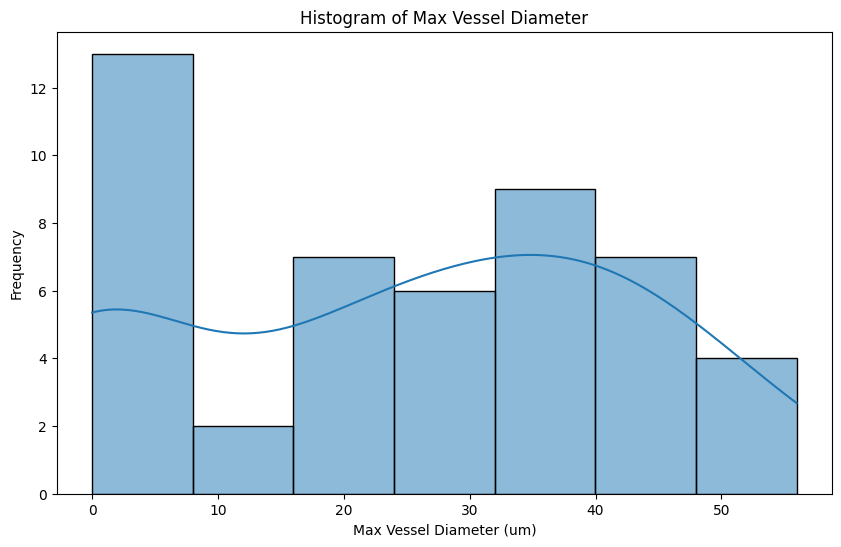

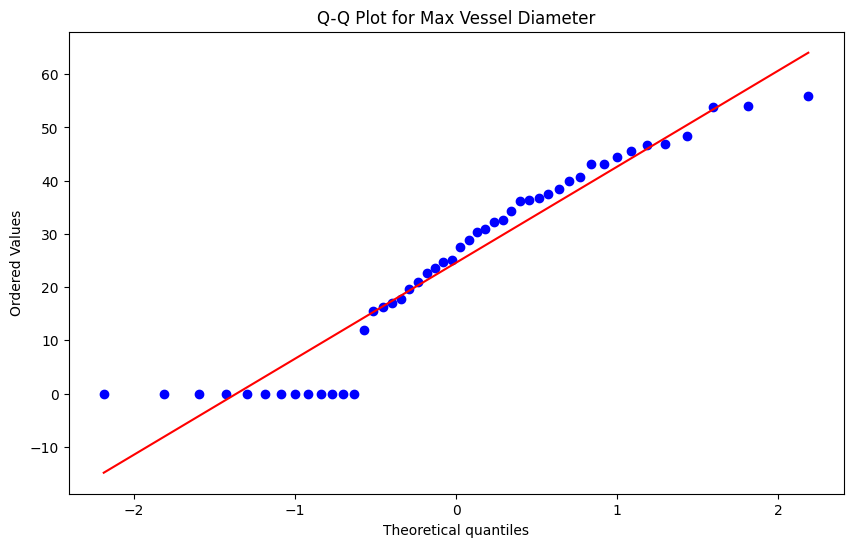

In [ ]:
import data_read
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# File paths
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

# Initialize collection for subject A52
subject_id = "A52"
data = {
    "Subject": [],
    "Scan ID": [],
    "Location ID": [],
    "Min Location ID": [],
    "Exposure": [],
    "Max Vessel Diameter": [],
}

# Process subject data for "A52"
subject = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "bloodflow")

# Collect the data from both the pre and post exposure visits
for visit in [subject.visit, subject.return_visit]:
    if visit and visit.blood_flow:
        # Recalculate min_location_id
        min_location_id = np.max(visit.locations) - 4

        for blood_data in visit.blood_flow:
            blood_data.get_max_diameter()

            data["Subject"].append(subject_id)
            data["Scan ID"].append(blood_data.scan_id)
            data["Location ID"].append(blood_data.location)
            data["Min Location ID"].append(min_location_id)
            data["Exposure"].append("Post" if blood_data.exposed else "Pre")
            data["Max Vessel Diameter"].append(blood_data.max_diameter)

# Create DataFrame
df = pd.DataFrame(data)

# Remove outliers (IQR method)
Q1 = df["Max Vessel Diameter"].quantile(0.25)
Q3 = df["Max Vessel Diameter"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[
    (df["Max Vessel Diameter"] >= lower_bound) &
    (df["Max Vessel Diameter"] <= upper_bound)
]

# Step 1: Shapiro-Wilk test for normality
stat, p = shapiro(df_clean["Max Vessel Diameter"])
print(f"Shapiro-Wilk test p-value: {p}")
if p < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data is normally distributed.")

# Step 2: Visual Inspection
# Plotting histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_clean["Max Vessel Diameter"], kde=True)
plt.title("Histogram of Max Vessel Diameter")
plt.xlabel("Max Vessel Diameter (um)")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot for normality check
plt.figure(figsize=(10, 6))
stats.probplot(df_clean["Max Vessel Diameter"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Max Vessel Diameter")
plt.show()

In [ ]:
import data_read
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# File paths
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

# Initialize collection
subject_id = "A52_2"
data = {
    "Subject": [],
    "Scan ID": [],
    "Location ID": [],
    "Min Location ID": [],
    "Exposure": [],
    "Max Vessel Diameter": [],
}

# Use process_subject_vivosight_data to get structured info for subject "A52"
subject = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "bloodflow")

# Process both the initial visit and return visit (if available)
for visit in [subject.visit, subject.return_visit]:
    if visit and visit.blood_flow:
        # Recalculate min_location_id
        min_location_id = np.max(visit.locations) - 4

        for blood_data in visit.blood_flow:
            blood_data.get_max_diameter()

            # Append the data to the dictionary
            data["Subject"].append(subject_id)
            data["Scan ID"].append(blood_data.scan_id)
            data["Location ID"].append(blood_data.location)
            data["Min Location ID"].append(min_location_id)
            data["Exposure"].append("Post" if blood_data.exposed else "Pre")
            data["Max Vessel Diameter"].append(blood_data.max_diameter)

# Create DataFrame
df = pd.DataFrame(data)

# Remove outliers (IQR method)
Q1 = df["Max Vessel Diameter"].quantile(0.25)
Q3 = df["Max Vessel Diameter"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[
    (df["Max Vessel Diameter"] >= lower_bound) &
    (df["Max Vessel Diameter"] <= upper_bound)
]

# Run Mann-Whitney U test for Pre vs Post per location
print("Mann-Whitney U Test: Pre vs Post by Location for subject A52\n")

for loc in [1, 2, 3, 4]:
    pre = df_clean[(df_clean["Location ID"] == loc) & (df_clean["Exposure"] == "Pre")]["Max Vessel Diameter"]
    post = df_clean[(df_clean["Location ID"] == loc) & (df_clean["Exposure"] == "Post")]["Max Vessel Diameter"]

    print(f" Location {loc}:")
    print(f"   Pre (n={len(pre)}), Post (n={len(post)})")

    if len(pre) >= 3 and len(post) >= 3:
        stat, p = mannwhitneyu(pre, post, alternative='two-sided')
        sig = " Significant" if p < 0.05 else "Not significant"
        print(f"   Mann-Whitney U p-value = {p:.4f} → {sig}\n")
    else:
        print("    Not enough data to compare\n")

data/Vivosight_data/A52_2_Results [<data_types.BloodFlow object at 0x11e8c85c0>, <data_types.BloodFlow object at 0x1207ecf20>, <data_types.BloodFlow object at 0x120d71250>, <data_types.BloodFlow object at 0x120d711c0>, <data_types.BloodFlow object at 0x12005a1e0>, <data_types.BloodFlow object at 0x120ebf110>, <data_types.BloodFlow object at 0x120058ec0>, <data_types.BloodFlow object at 0x1200584d0>, <data_types.BloodFlow object at 0x120ebc680>, <data_types.BloodFlow object at 0x120149820>, <data_types.BloodFlow object at 0x1202ad3a0>, <data_types.BloodFlow object at 0x120ef78c0>, <data_types.BloodFlow object at 0x120500380>, <data_types.BloodFlow object at 0x120ef6480>, <data_types.BloodFlow object at 0x12014b410>, <data_types.BloodFlow object at 0x120ef6a50>, <data_types.BloodFlow object at 0x11ffd5d30>, <data_types.BloodFlow object at 0x120ef4050>, <data_types.BloodFlow object at 0x1203fbb00>, <data_types.BloodFlow object at 0x120ef47a0>, <data_types.BloodFlow object at 0x11fe6aea0>,

In [ ]:
# Calculate mean, median, and standard deviation of Max Vessel Diameter
mean_diameter = df_clean["Max Vessel Diameter"].mean()
median_diameter = df_clean["Max Vessel Diameter"].median()
std_diameter = df_clean["Max Vessel Diameter"].std()

# Print the results
print(f"Mean of Max Vessel Diameter: {mean_diameter:.2f}")
print(f"Median of Max Vessel Diameter: {median_diameter:.2f}")
print(f"Standard Deviation of Max Vessel Diameter: {std_diameter:.2f}")

Mean of Max Vessel Diameter: 49.45
Median of Max Vessel Diameter: 47.71
Standard Deviation of Max Vessel Diameter: 21.52


In [ ]:
# Group by Location and calculate statistics (mean, median, standard deviation)
location_stats = df_clean.groupby("Location")["Max Vessel Diameter"].agg(['mean', 'median', 'std'])

# Display the statistics
print(location_stats)

KeyError: 'Location'